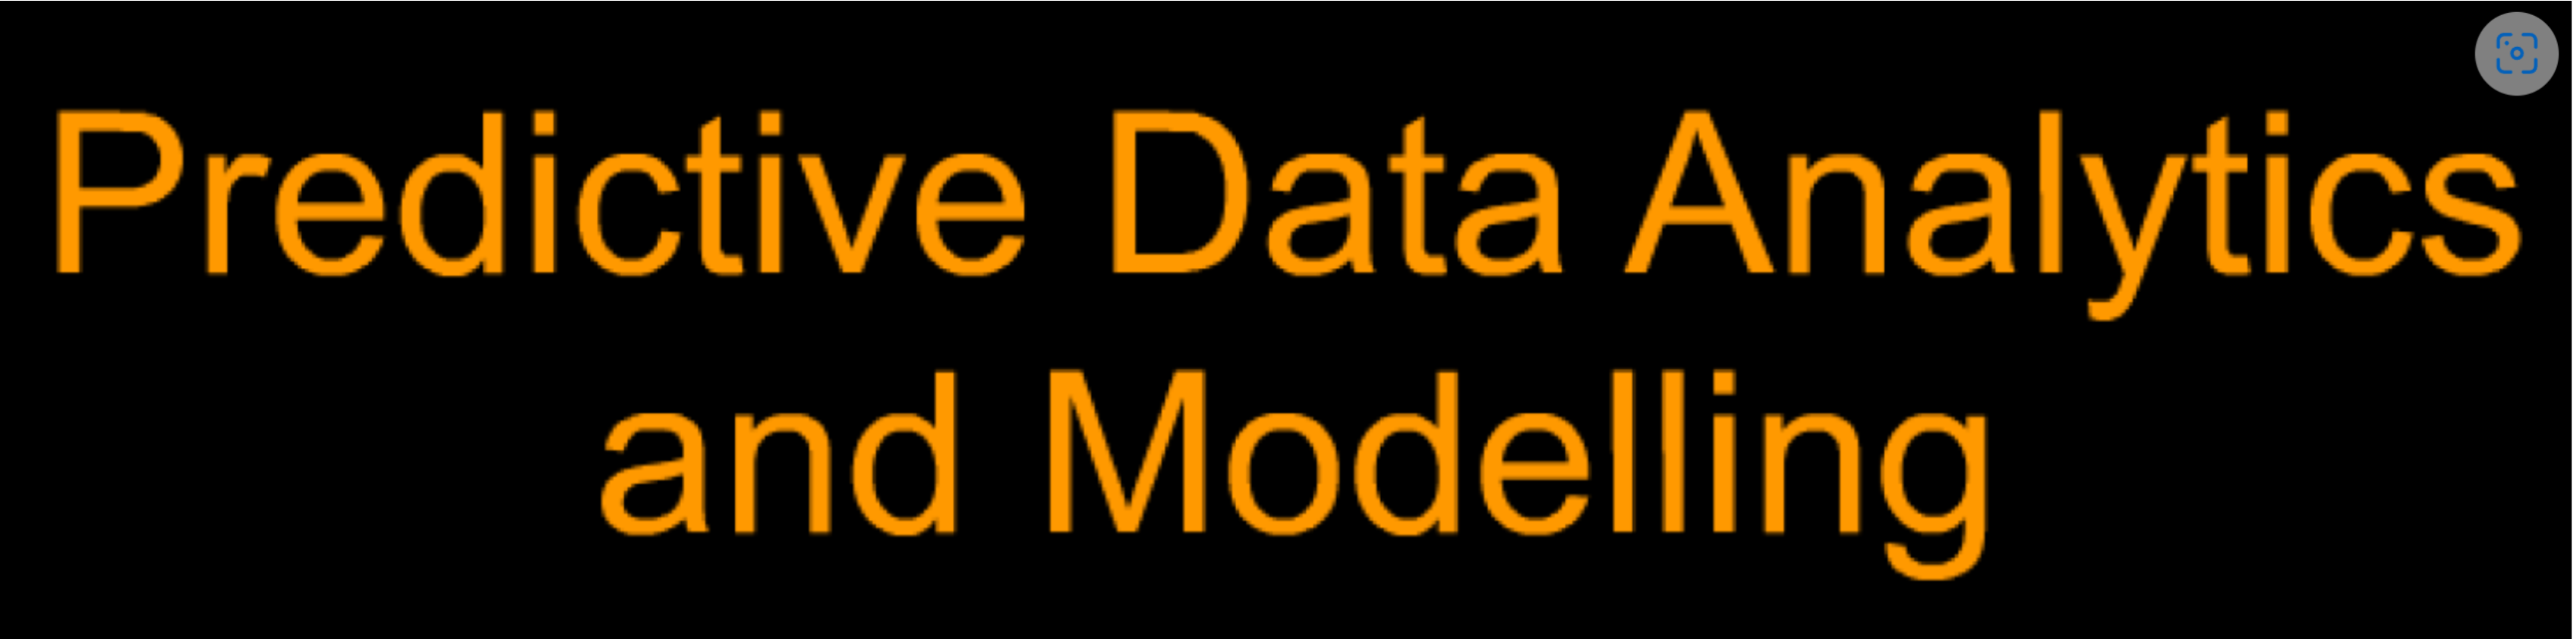
# --------------BIDA 406
# ---------------------------Hossen Teimoorinia 
# -------------------------------------------------------March 18, 2023 
# ------------------------------------------------------------------------UVic  

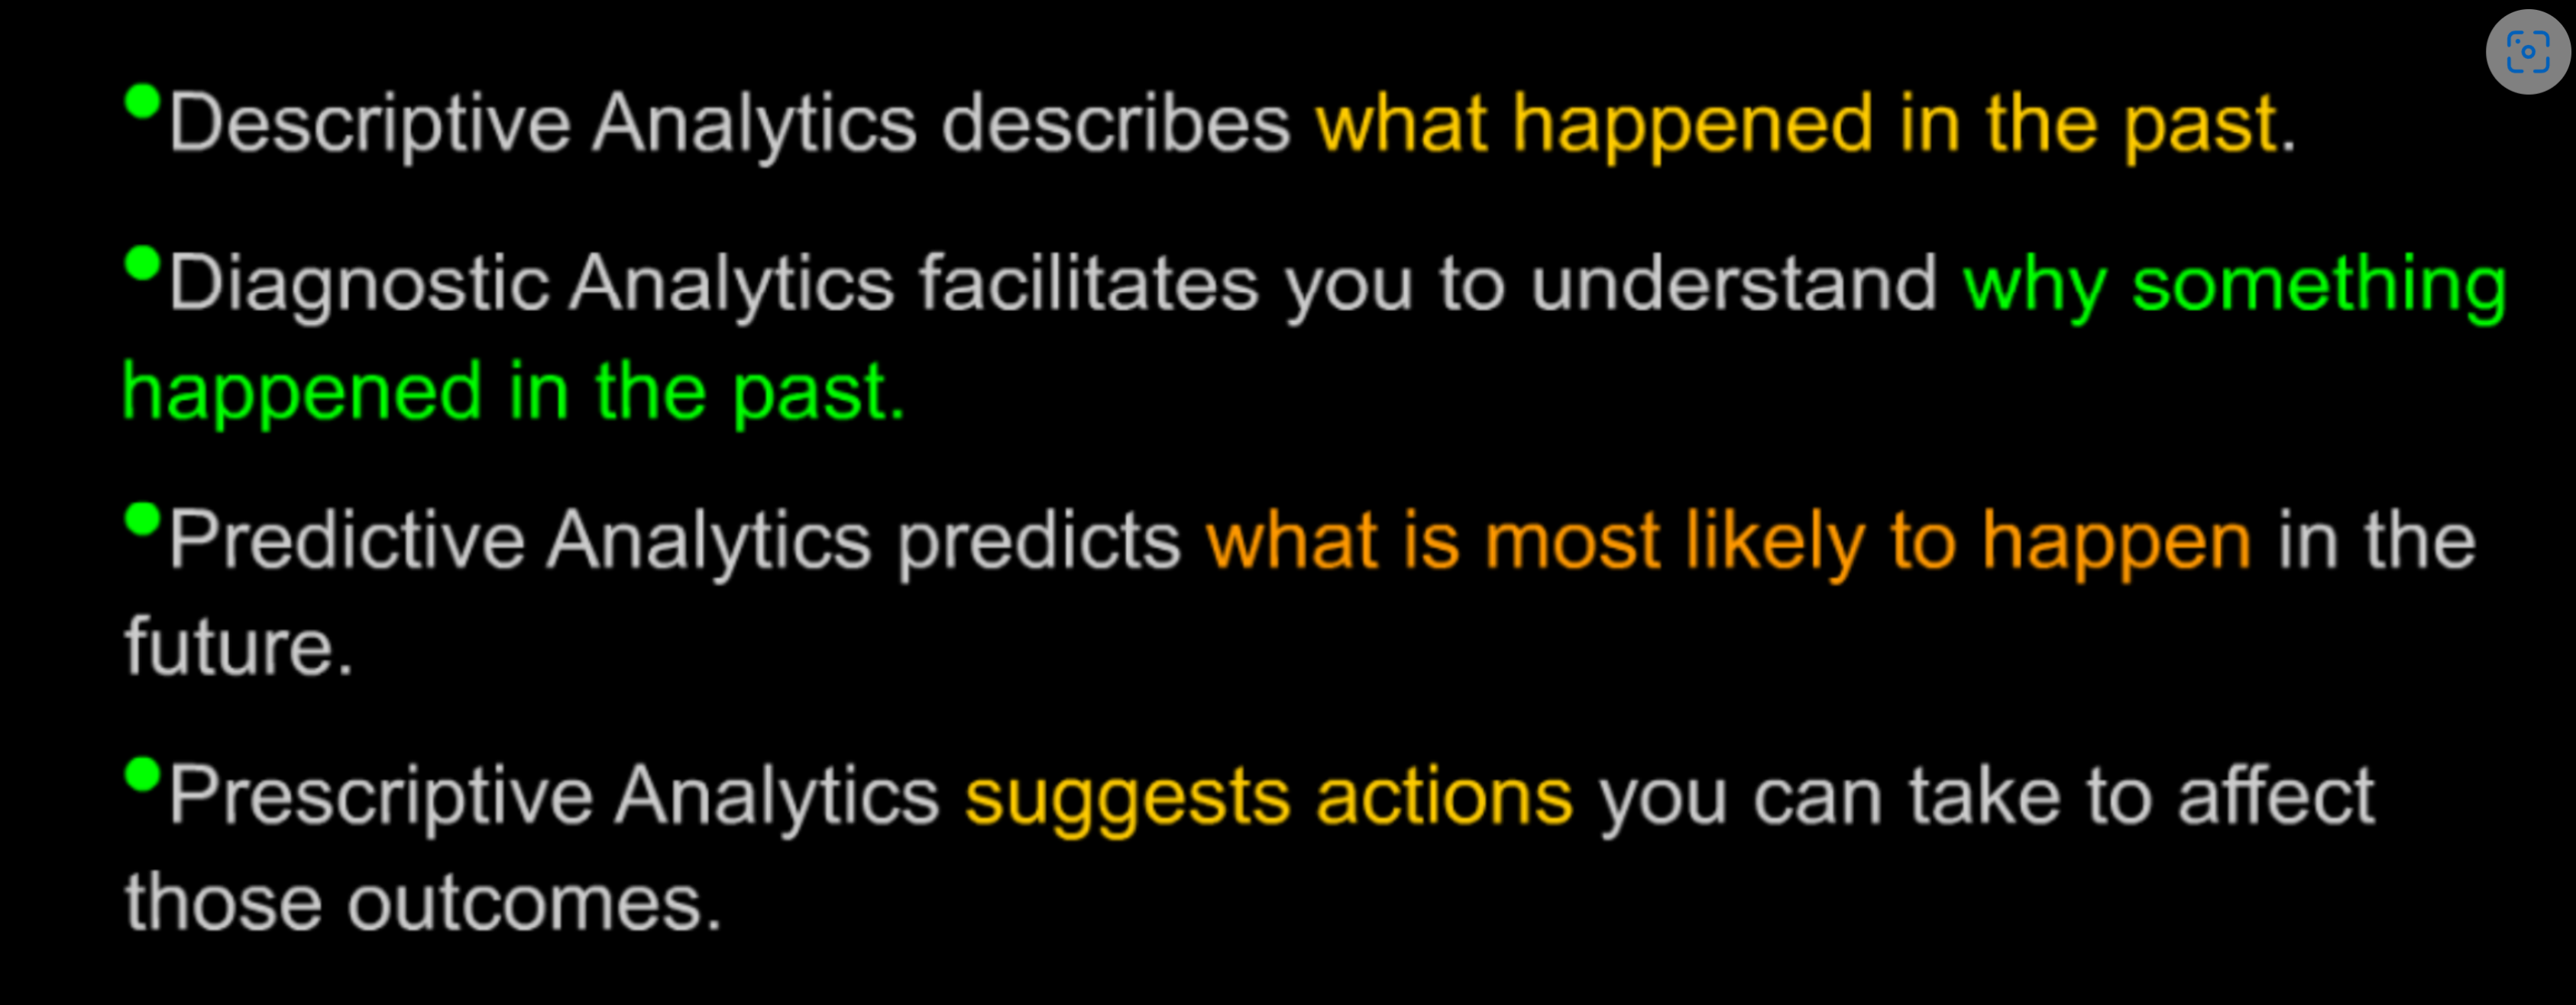

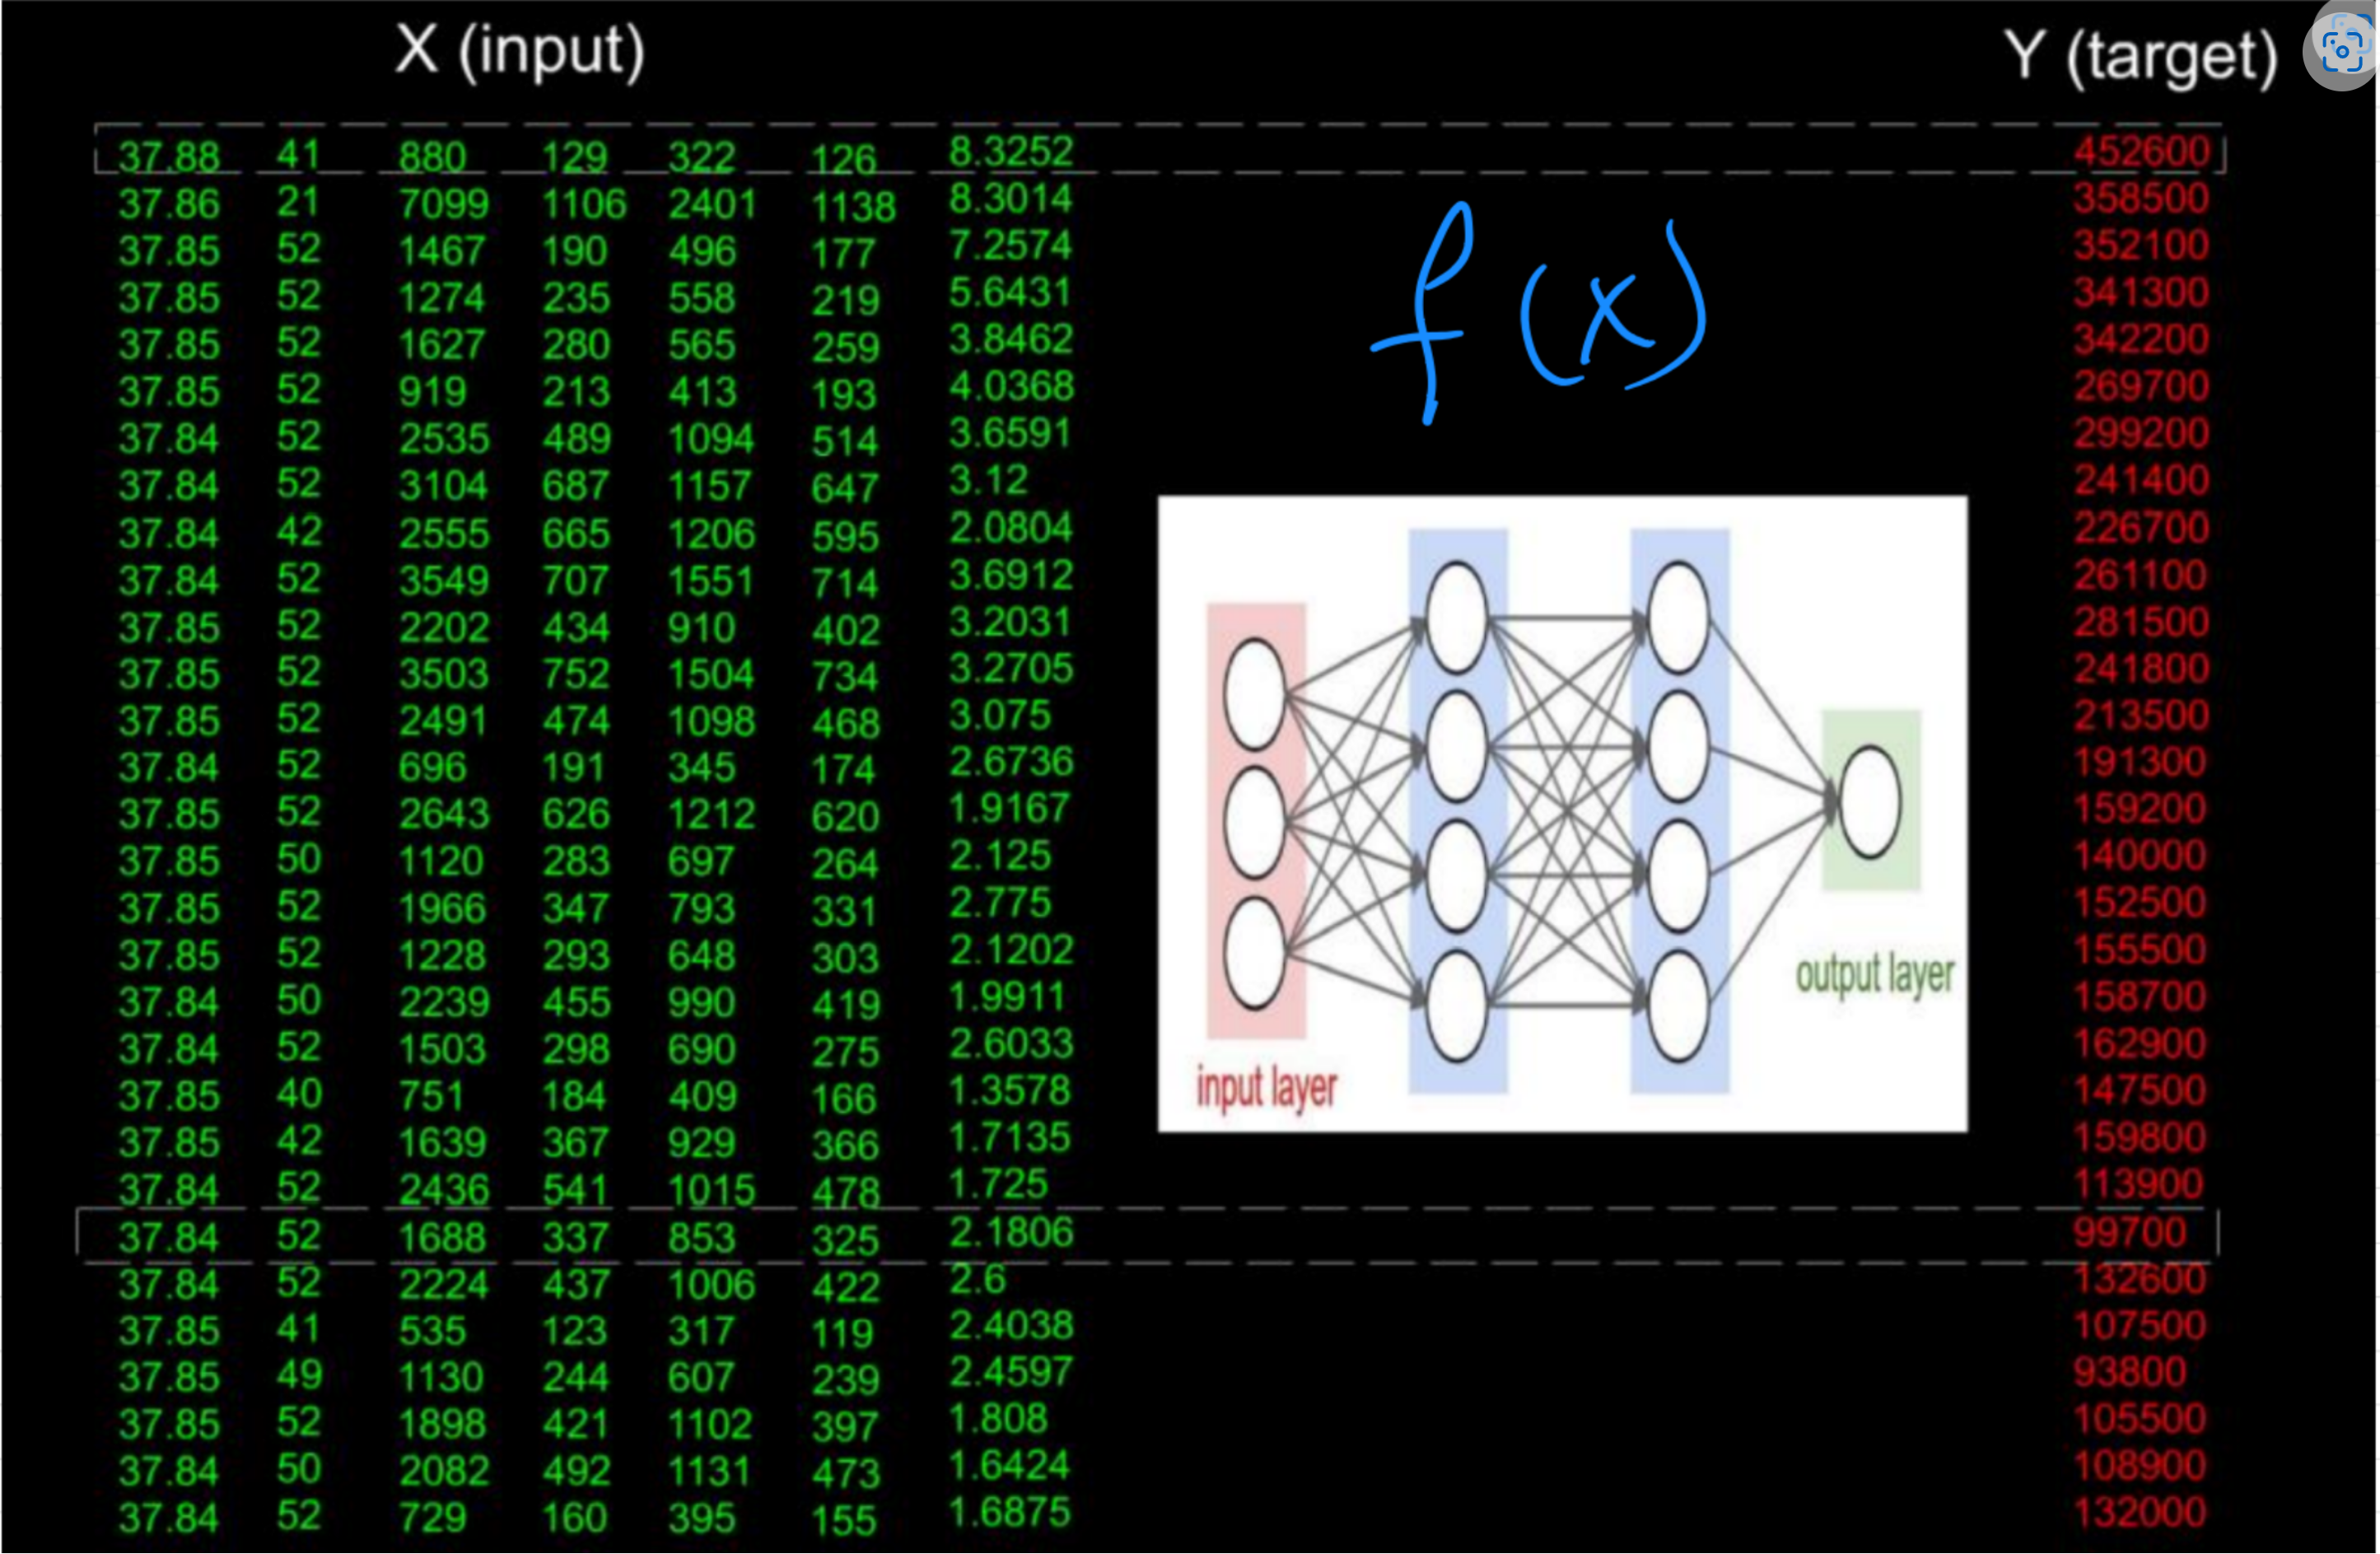

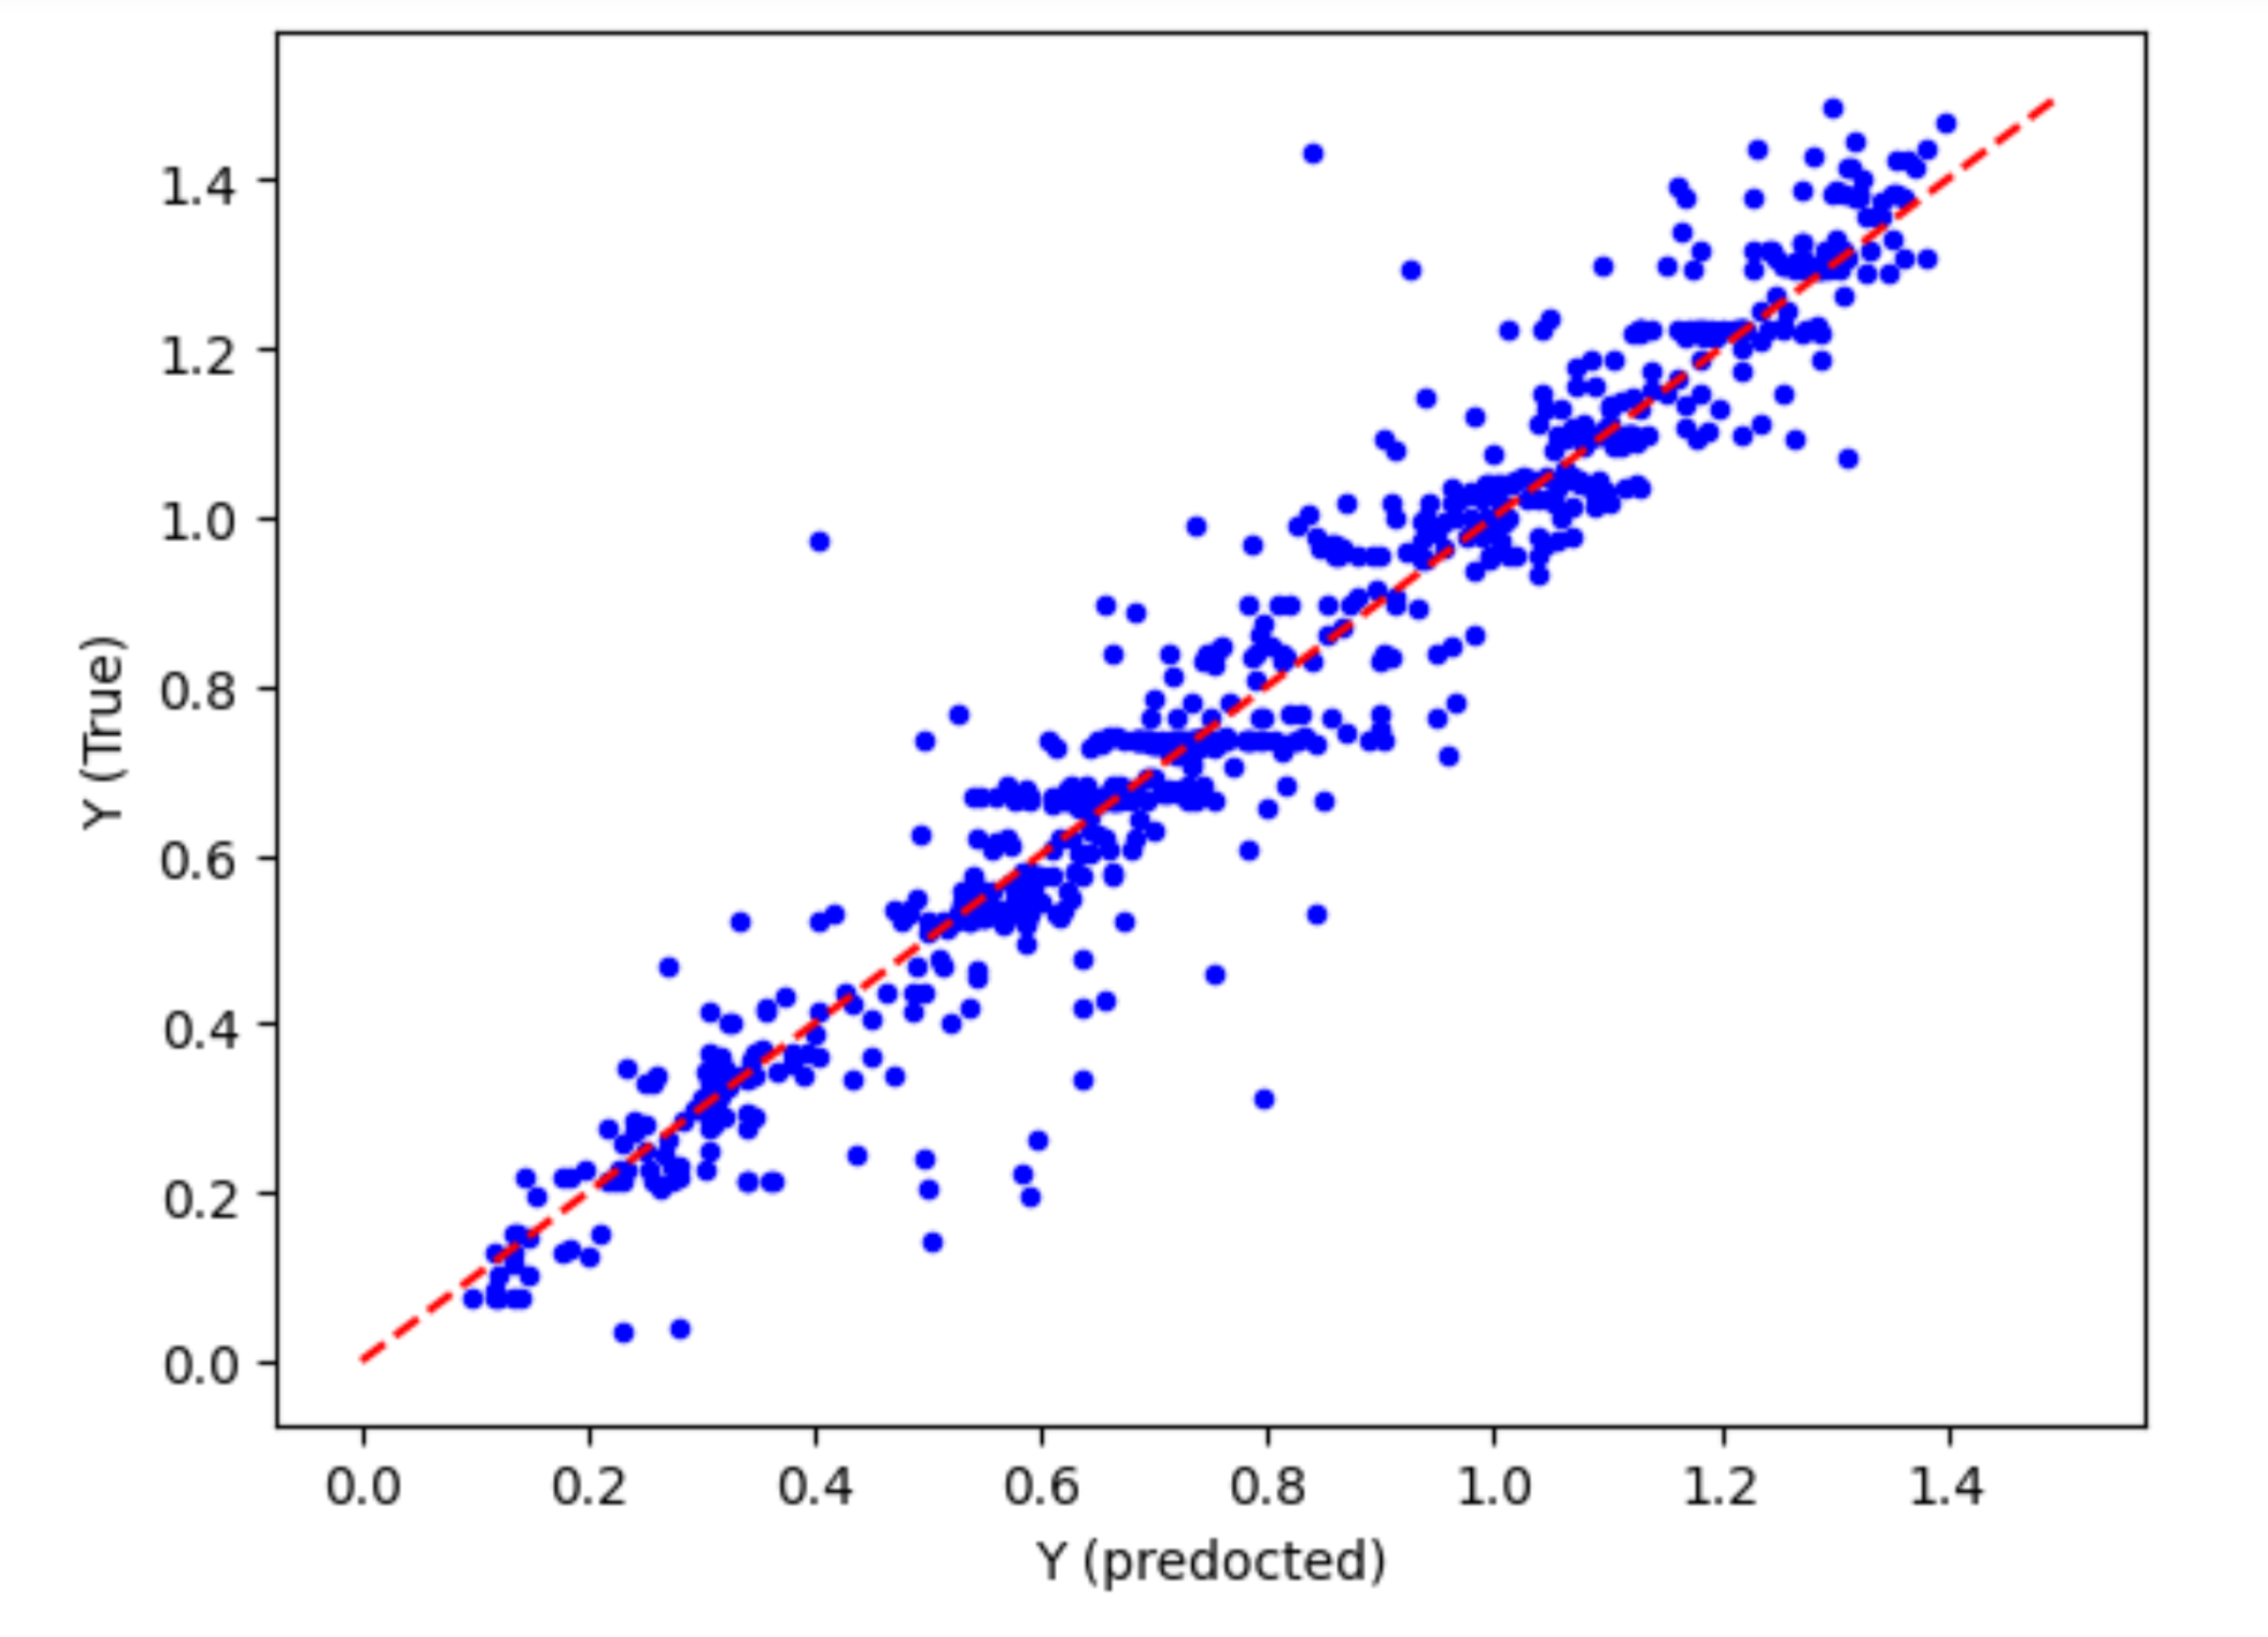

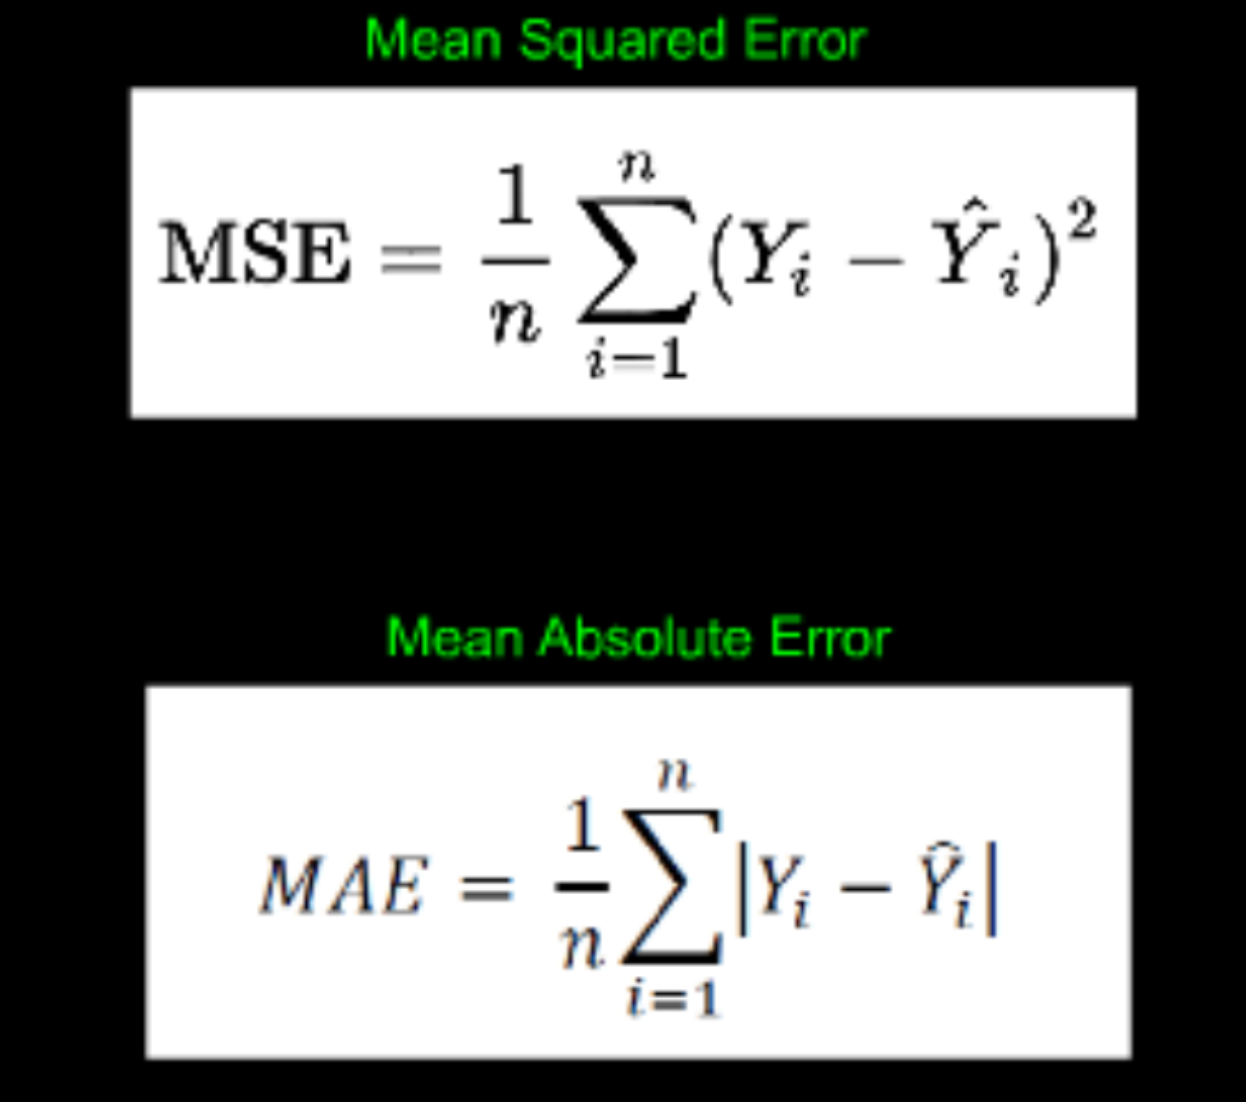

# What do we mean by a linear regression model?

# Y = a0+a1(X1)+a2(X2)

# Can we use MSE for a nonlinear model?

# Do a regression with Excel and using data_redshift.csv

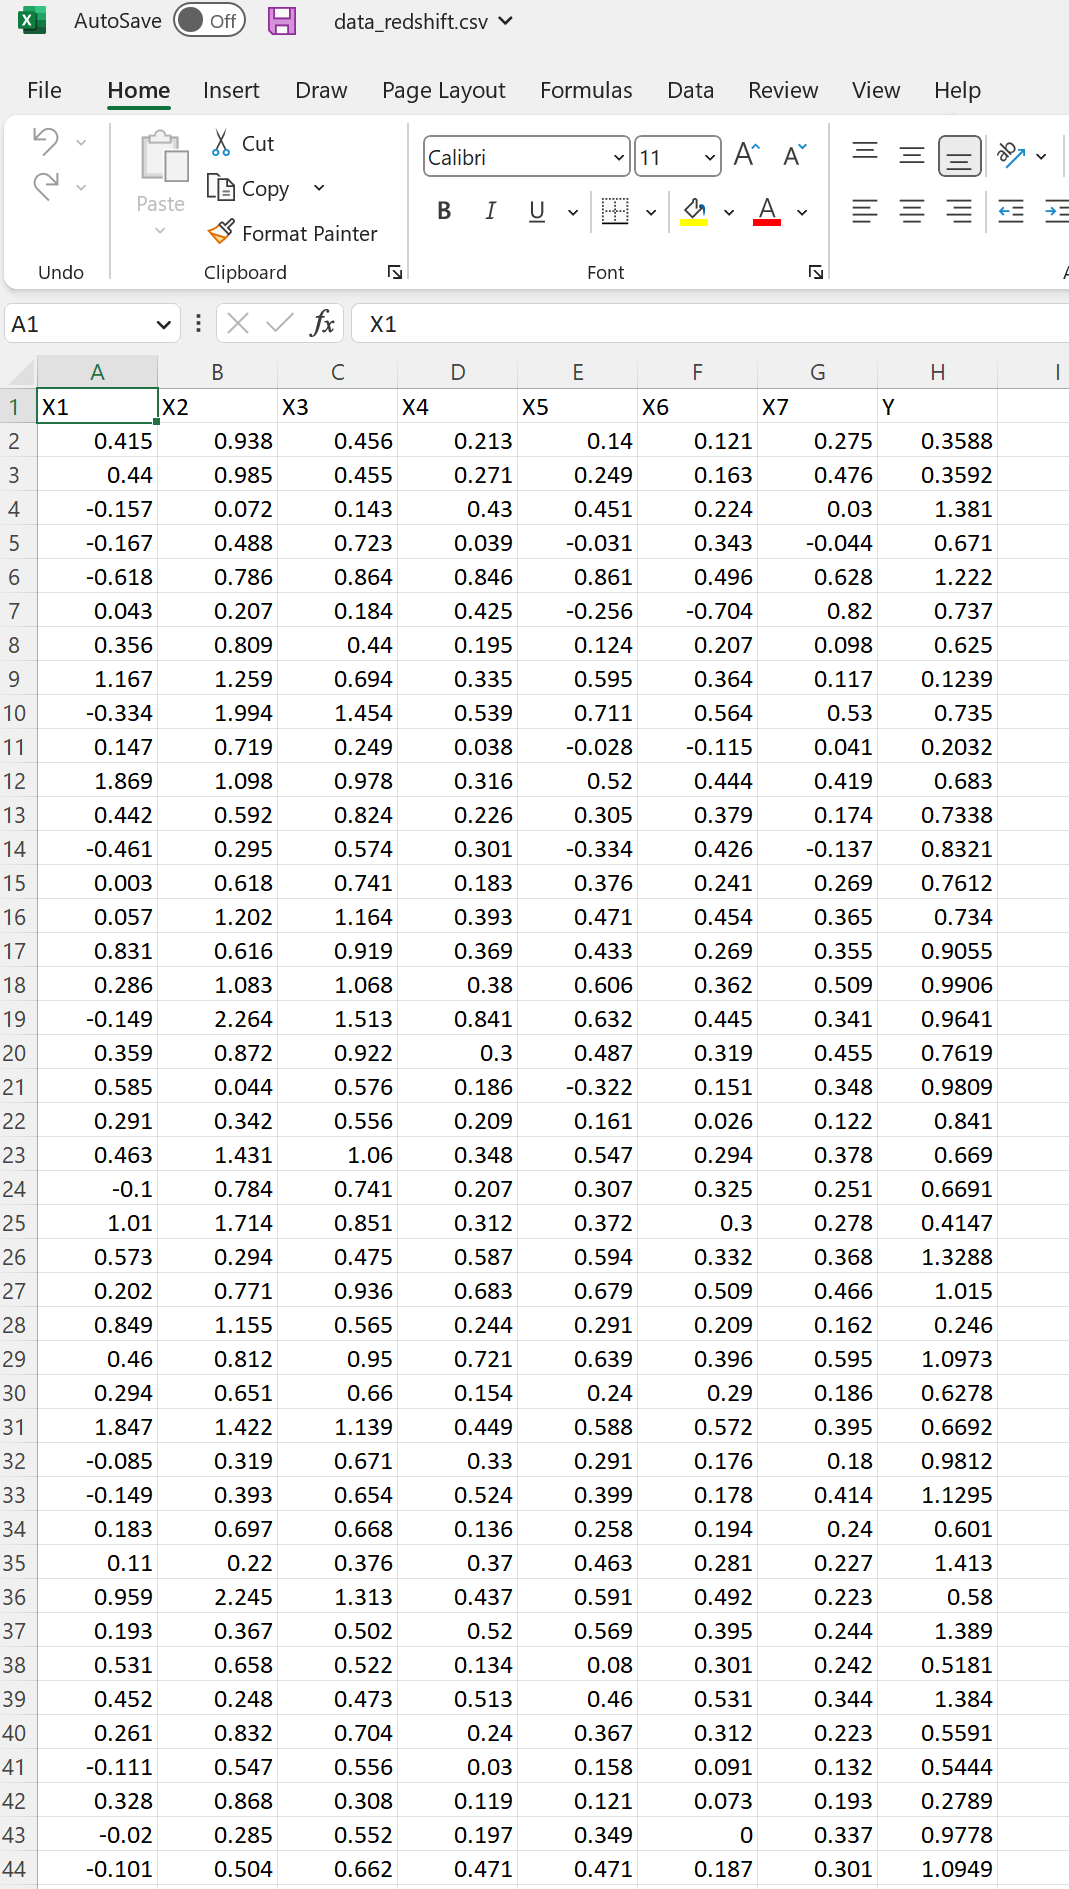
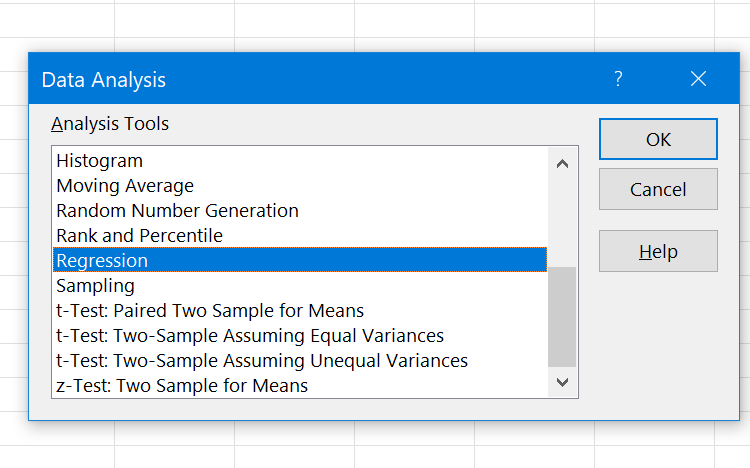
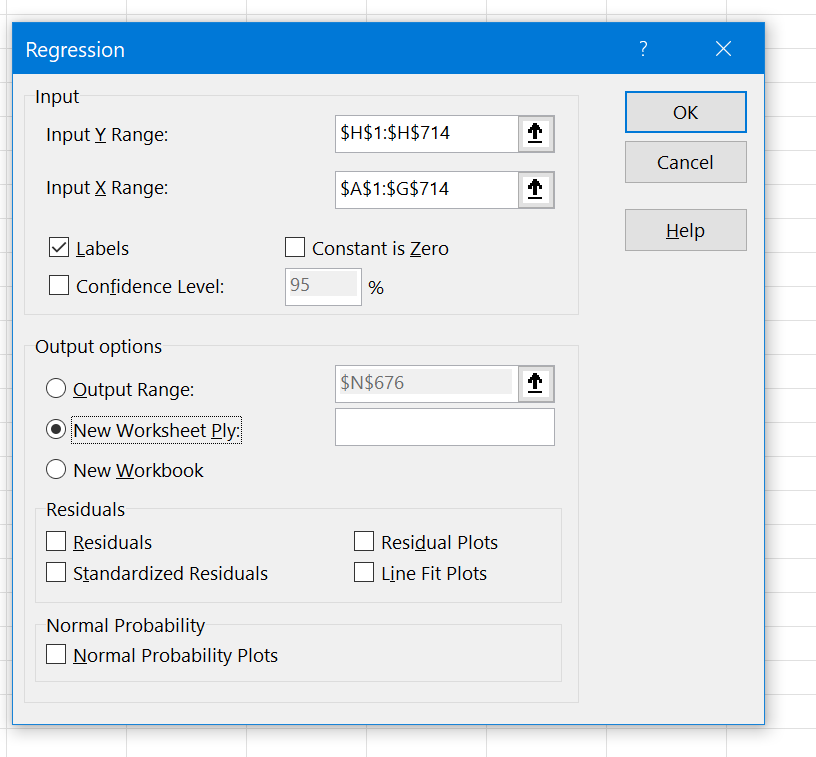
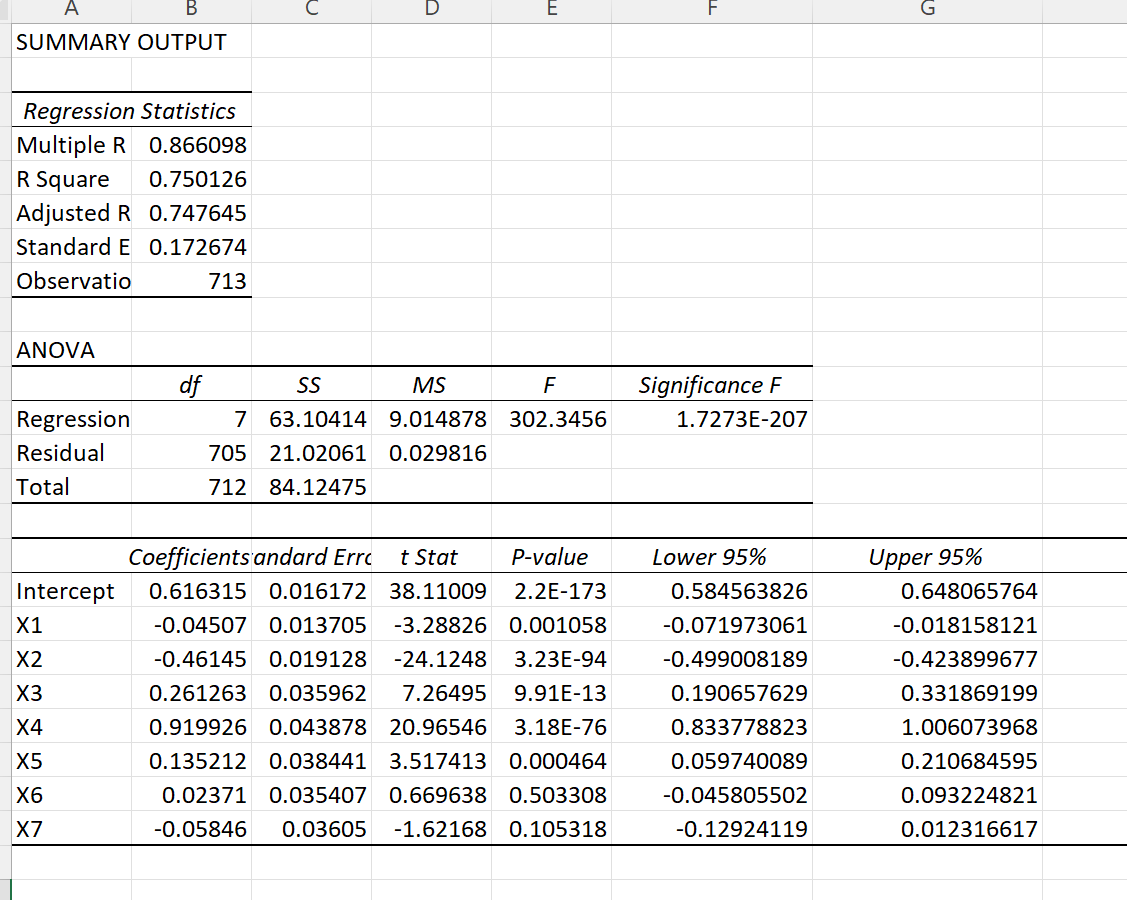

# Doing the same with SKlearn
# load the packegs  you nead

In [1]:
import pandas as pd
#import pyploy with short name plt
import matplotlib.pyplot as plt

# import numpy with short name np
import numpy as np

# import linear_model from sklrean
from sklearn import linear_model

# choose the Linear Regression model from linear_model
linear_model_reg = linear_model.LinearRegression()

# import two models "StandardScaler" and "MinMaxScaler"
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #line #1


In [2]:
data= pd.read_csv('data_redshift.csv')
data

X1     X2     X3     X4     X5     X6     X7       Y
0    0.415  0.938  0.456  0.213  0.140  0.121  0.275  0.3588
1    0.440  0.985  0.455  0.271  0.249  0.163  0.476  0.3592
2   -0.157  0.072  0.143  0.430  0.451  0.224  0.030  1.3810
3   -0.167  0.488  0.723  0.039 -0.031  0.343 -0.044  0.6710
4   -0.618  0.786  0.864  0.846  0.861  0.496  0.628  1.2220
..     ...    ...    ...    ...    ...    ...    ...     ...
708 -0.090  0.561  0.687  0.140  0.207  0.228  0.213  0.7053
709  0.316  1.642  1.539  0.779  0.612  0.500  0.327  0.9667
710  0.875  0.472  0.717  0.540  0.288  0.370  0.038  1.0361
711  0.249  0.841  0.520  0.213  0.128  0.313  0.040  0.4767
712  0.741  0.100  0.577  0.354 -0.336  1.022  0.043  1.0450

[713 rows x 8 columns]

In [3]:
X_train= data[['X1', 'X2','X3','X4','X5','X6','X7']].values
Y_train= data[['Y']].values

print (np.shape(X_train),np.shape(Y_train))

(713, 7) (713, 1)


In [4]:
# we want to normalize the input using SKlearn


# choose one model with proper name
scaler_Norm=  StandardScaler()

# Find the trainable paramters of the model 

scaler_Norm.fit(X_train) 


X_train_Norm= scaler_Norm.transform(X_train)  # Line #4

print('Done!')

Done!


Text(0, 0.5, 'N')

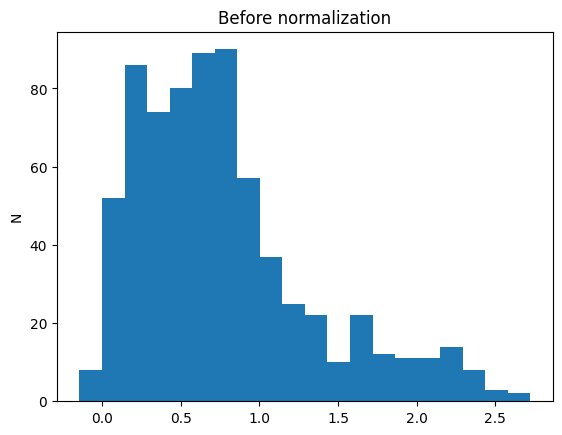

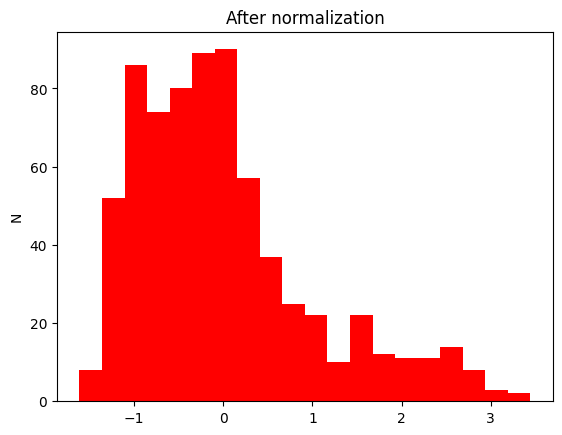

In [5]:
# check/plot some of columns
plt.figure(1)
plt.hist(X_train[:,1],bins=20, )
plt.title('Before normalization')
plt.ylabel('N')

plt.figure(2)
plt.hist(X_train_Norm[:,1],bins=20,color='r')
plt.title('After normalization')
plt.ylabel('N')

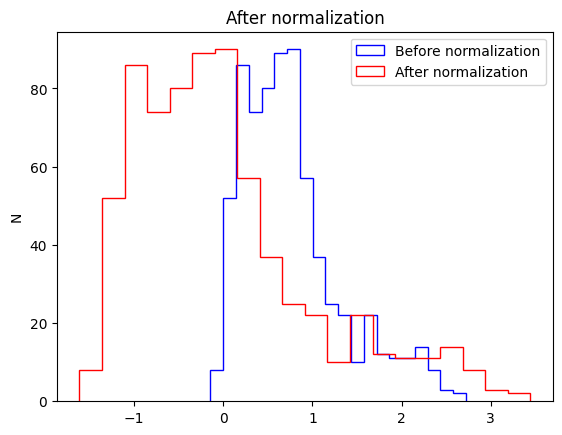

In [6]:
# check/plot some of columns
plt.figure(1)
plt.hist(X_train[:,1],bins=20, color='b', histtype='step',label='Before normalization')
plt.title('Before normalization')
plt.ylabel('N')


plt.hist(X_train_Norm[:,1],bins=20,color='r',histtype='step',label='After normalization')
plt.title('After normalization')
plt.ylabel('N')
plt.legend()

In [7]:
# fit the model using the training set: (X and Y)
linear_model_reg.fit(X_train_Norm,Y_train)

# use the trained model for new predictions
Y_predicted = linear_model_reg.predict(X_train_Norm)

print (np.shape(Y_train),np.shape(Y_predicted) )

(713, 1) (713, 1)


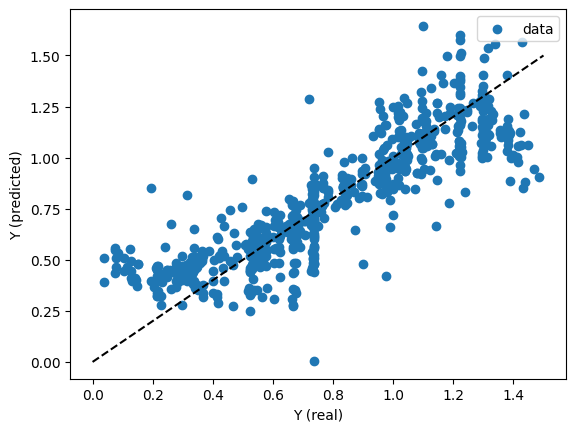

In [8]:
plt.scatter(Y_train,Y_predicted,label='data')
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted)')
plt.plot([0,1.5],[0,1.5],'--k')
plt.legend()

mean =  9.996678566751059e-17
median =  0.0039894585742092925
SD =  0.1717029957612411


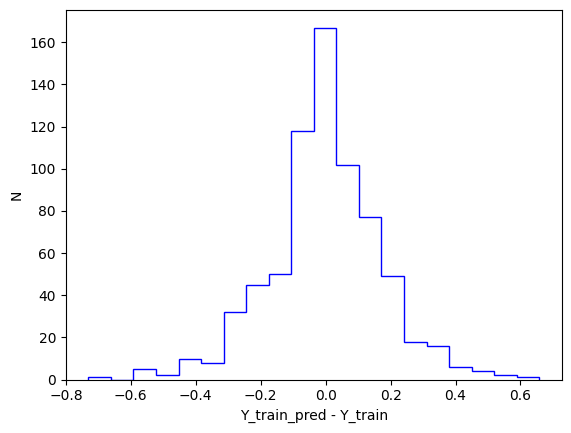

In [9]:
plt.hist(Y_predicted-Y_train,20,color='b',histtype='step')
plt.xlabel('Y_train_pred - Y_train')
plt.ylabel('N')

print ('mean = ',np.mean(Y_predicted-Y_train) )
print ('median = ',np.median(Y_predicted-Y_train) )
print ('SD = ',np.std(Y_predicted-Y_train) )

mean =  9.996678566751059e-17
median =  0.0039894585742092925
SD =  0.1717029957612411


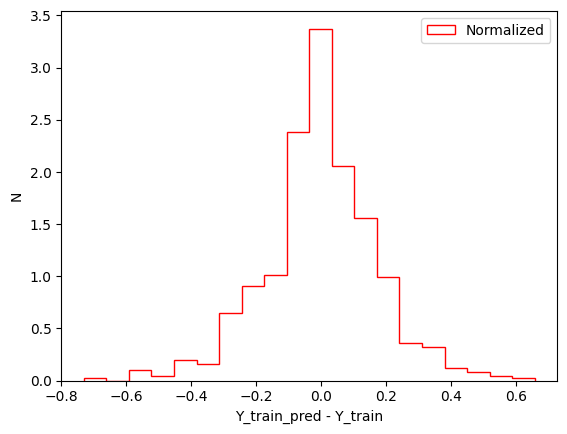

In [10]:
plt.hist(Y_predicted-Y_train,20,color='r',histtype='step',density=1,label='Normalized')
plt.xlabel('Y_train_pred - Y_train')
plt.ylabel('N')
plt.legend()

print ('mean = ',np.mean(Y_predicted-Y_train) )
print ('median = ',np.median(Y_predicted-Y_train) )
print ('SD = ',np.std(Y_predicted-Y_train) )

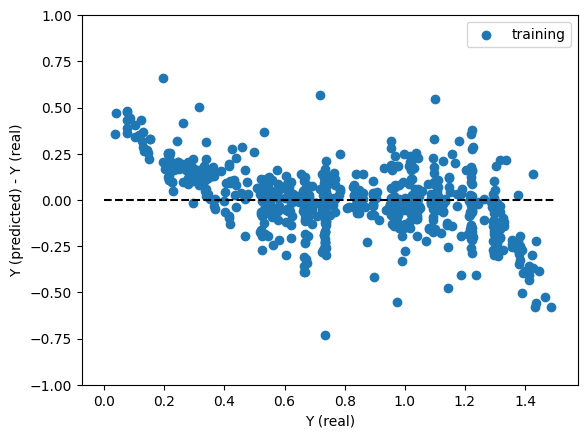

In [11]:
plt.scatter(Y_train,Y_predicted-Y_train,label='training')
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted) - Y (real)')
plt.plot([0,1.5],[0,0],'--k')
plt.ylim([-1,1])
plt.legend()

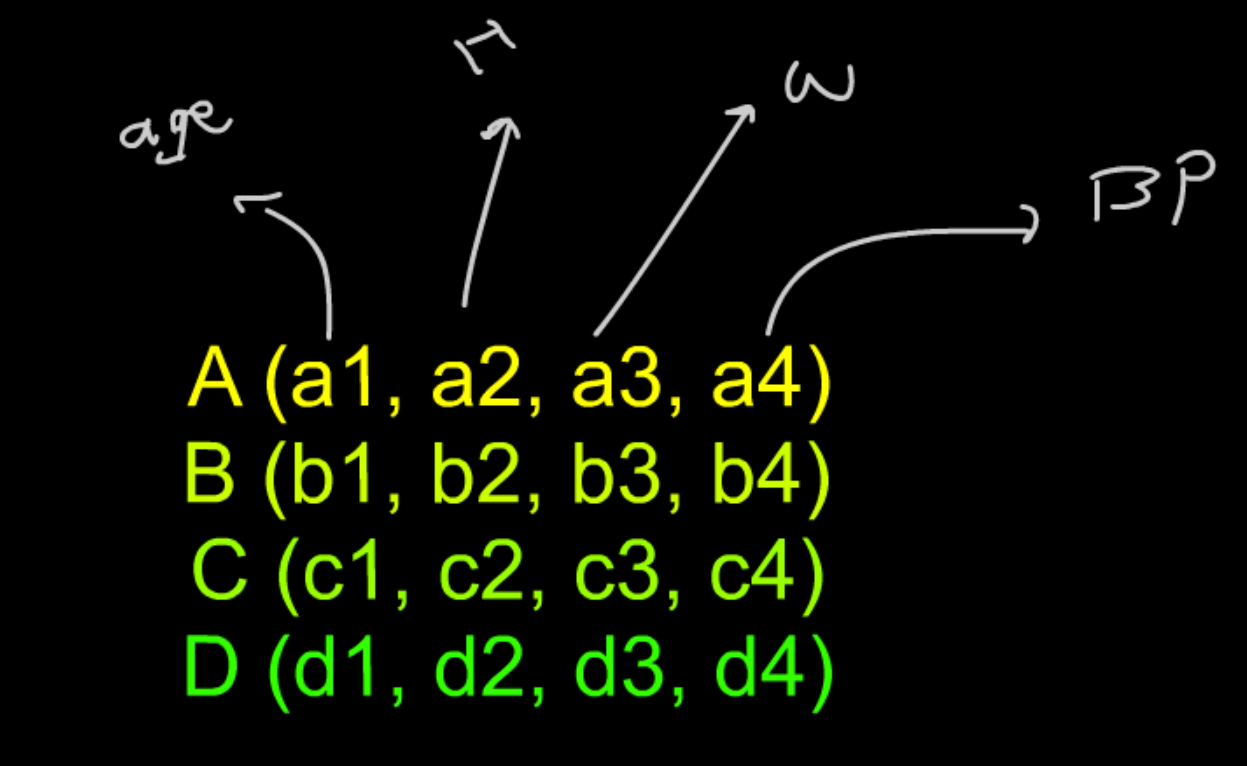
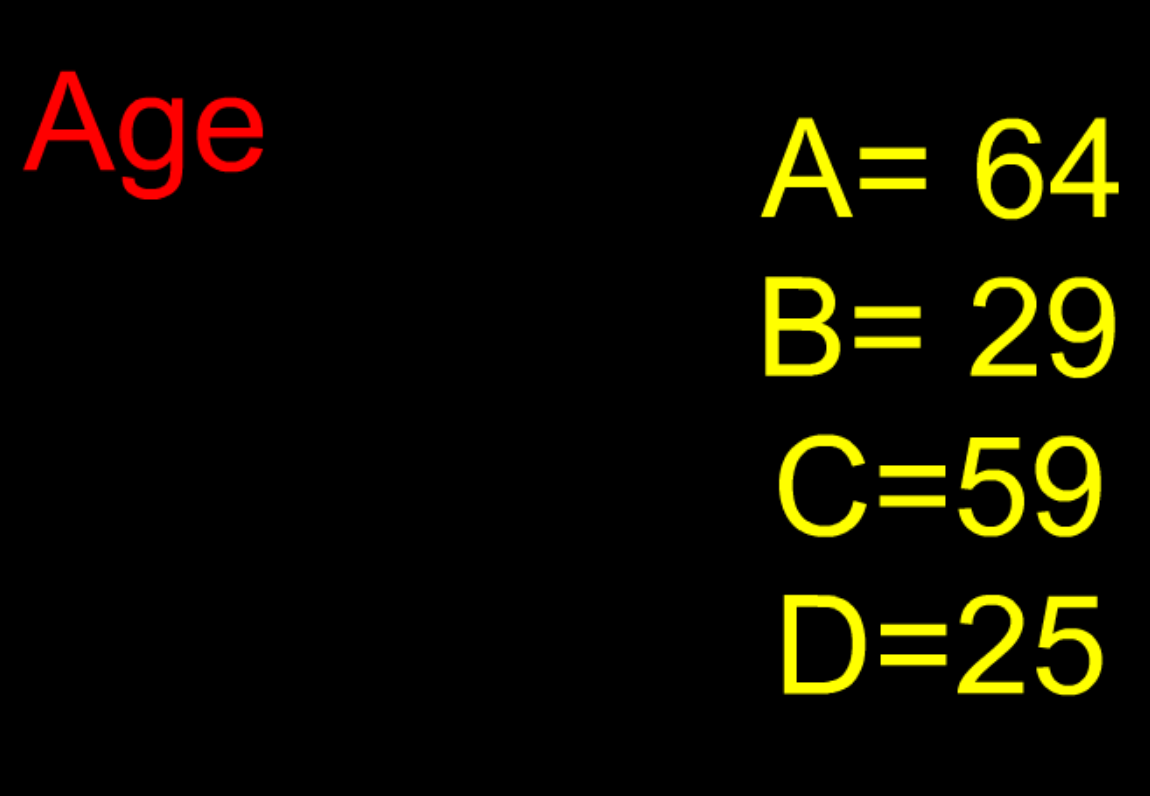
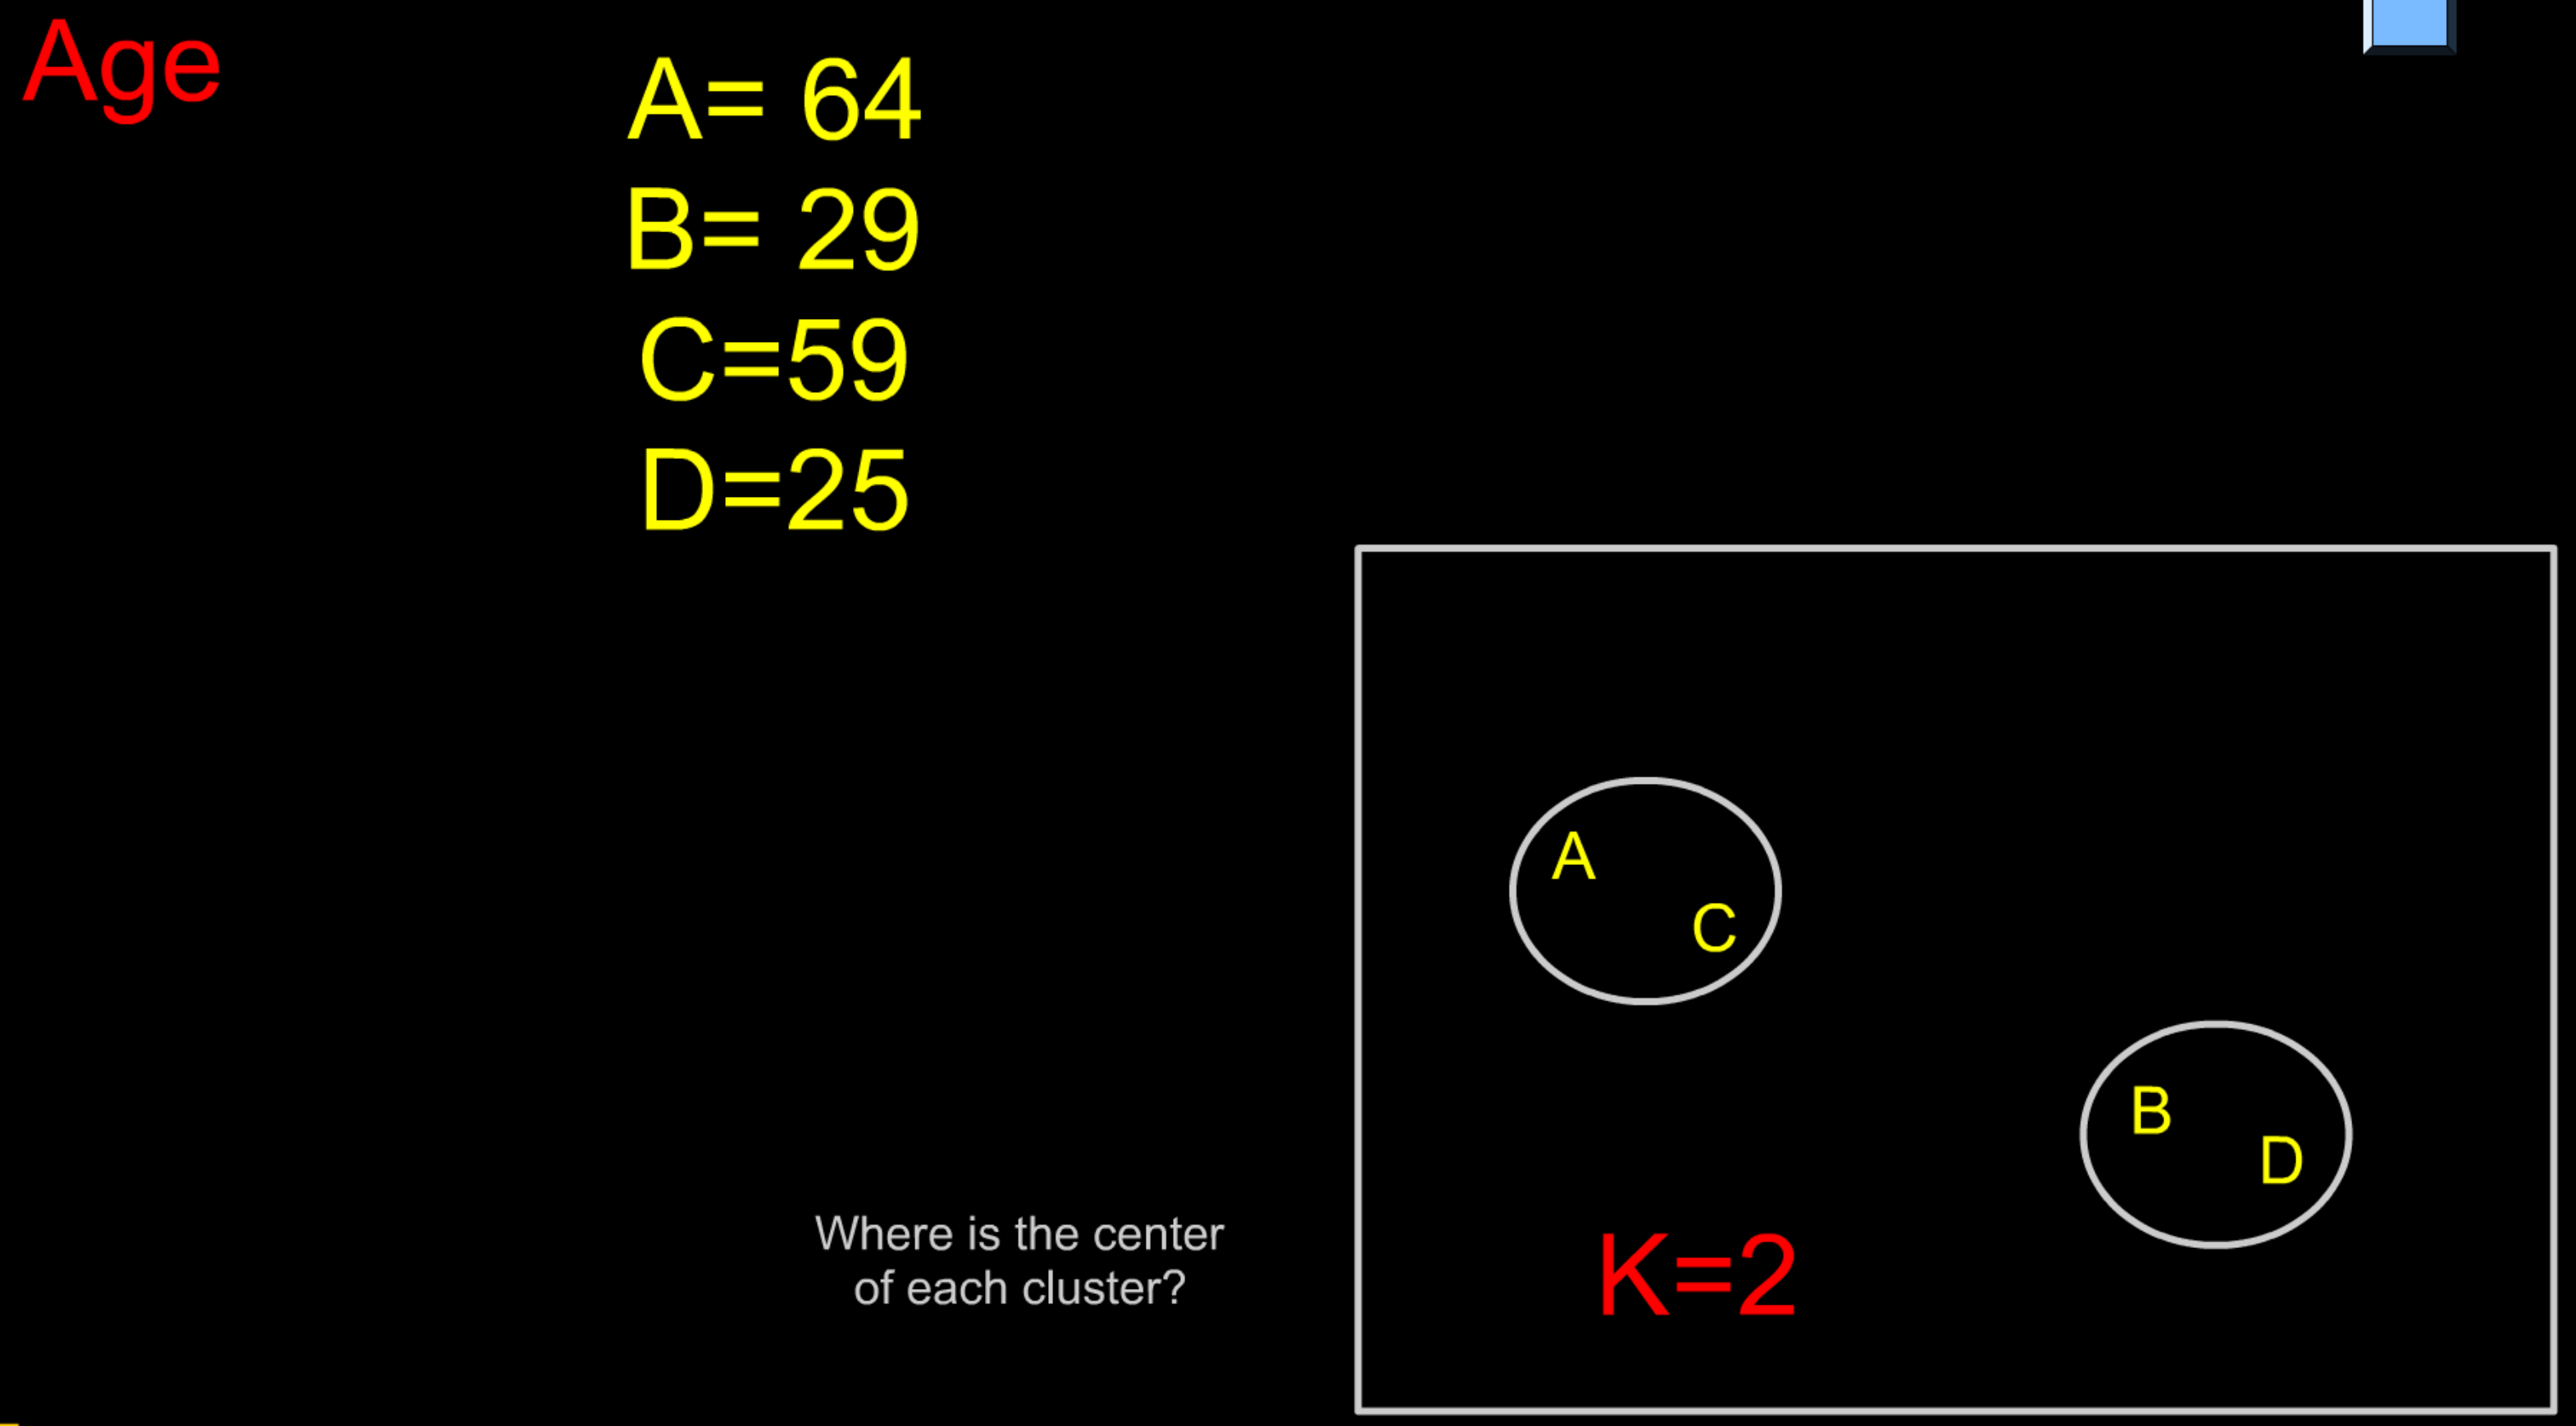
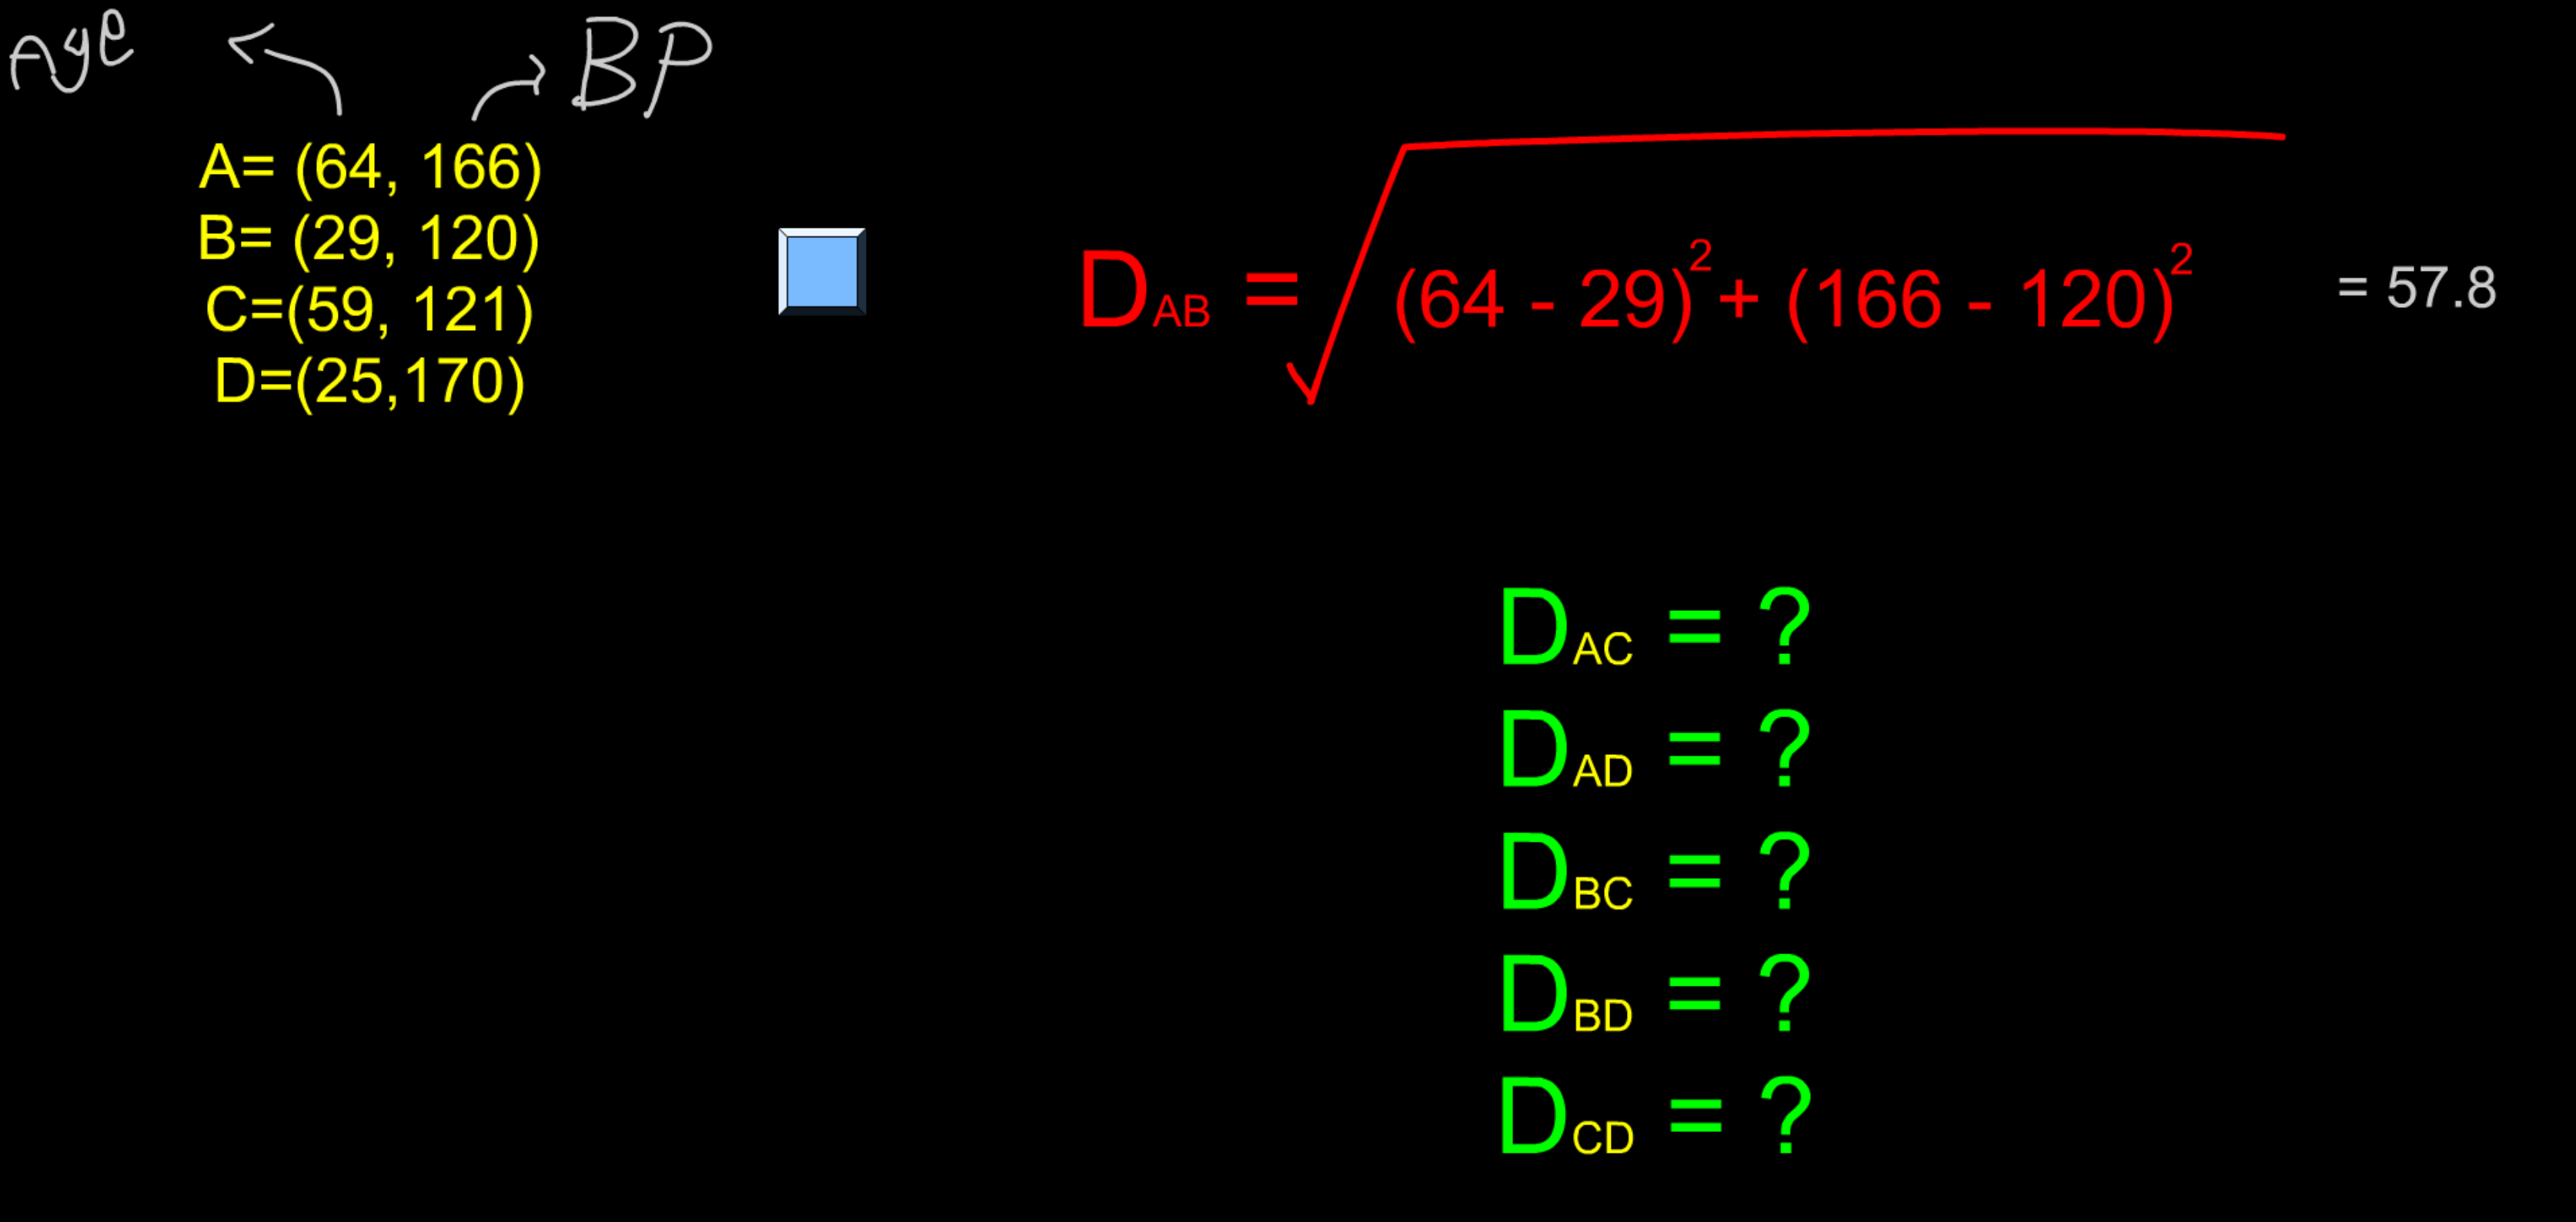

# Predicting the same data set but with a diffrent model

In [1]:
# import the KNN model
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Define your model
KNN =  KNeighborsRegressor(n_neighbors=1)

In [3]:
# fit the data (the traing step)
KNN.fit (X_train_Norm,Y_train)

NameError: name 'X_train_Norm' is not defined

In [15]:
# use the trained model for new predictions
Y_predicted_KNN = KNN.predict(X_train_Norm)

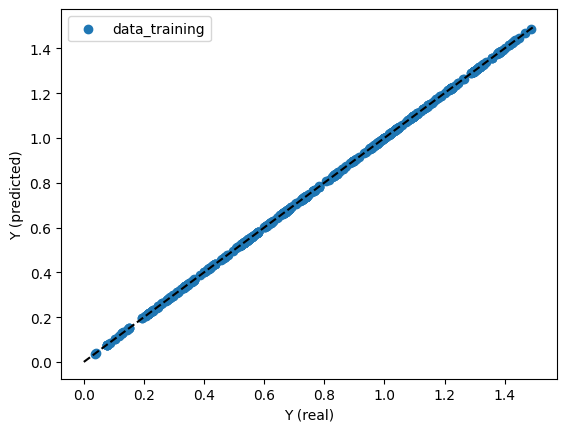

In [16]:
plt.scatter(Y_train,Y_predicted_KNN,label='data_training')
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted)')
plt.plot([0,1.5],[0,1.5],'--k')
plt.legend()

mean =  0.0
median =  0.0
SD =  0.0


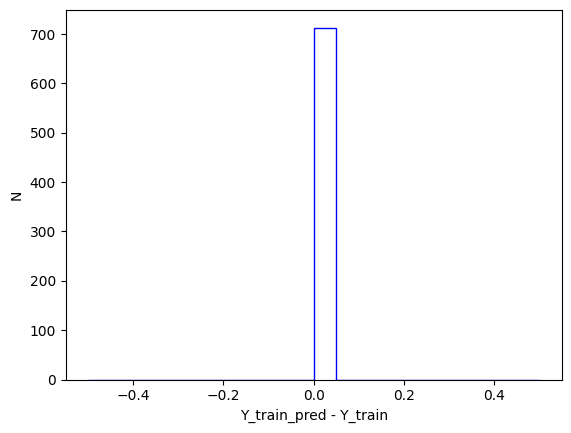

In [17]:
plt.hist(Y_predicted_KNN-Y_train,20,color='b',histtype='step')
plt.xlabel('Y_train_pred - Y_train')
plt.ylabel('N')

print ('mean = ',np.mean(Y_predicted_KNN-Y_train) )
print ('median = ',np.median(Y_predicted_KNN-Y_train) )
print ('SD = ',np.std(Y_predicted_KNN-Y_train) )

In [18]:
# split your data using:

from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X_train_Norm, Y_train, test_size=.2, random_state=1)

In [20]:
print('the size of input (training set) =  ',np.shape(X_train))
print('the size of target (training set) =  ',np.shape(Y_train))   
print('----------------------------------------------------')
print('the size of input (test set) =  ',np.shape(X_test))
print('the size of target (test set) =  ',np.shape(Y_test))  

the size of input (training set) =   (570, 7)
the size of target (training set) =   (570, 1)
----------------------------------------------------
the size of input (test set) =   (143, 7)
the size of target (test set) =   (143, 1)


In [21]:
# choose your model
KNN =  KNeighborsRegressor(n_neighbors=8)

# train your model using training set
KNN.fit (X_train,Y_train)

KNeighborsRegressor(n_neighbors=8)

In [22]:
# predict on both training set and the test set

Y_train_pred= KNN.predict(X_train)
Y_test_pred= KNN.predict(X_test)

print(np.shape(Y_train_pred),np.shape(Y_test_pred))

(570, 1) (143, 1)


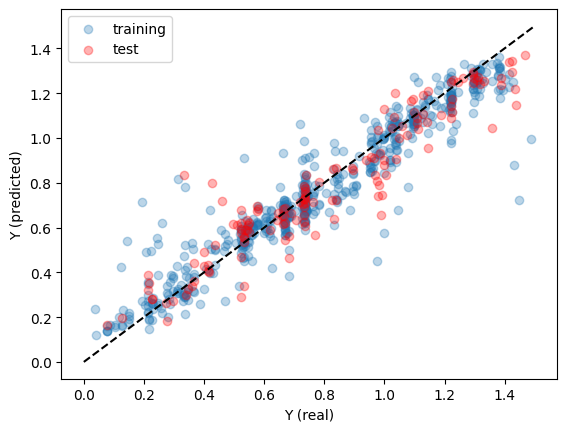

In [23]:
plt.scatter(Y_train,Y_train_pred,label='training',alpha=.3)
plt.scatter(Y_test,Y_test_pred,label='test',color='r',alpha=.3) 
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted)')
plt.plot([0,1.5],[0,1.5],'--k')
plt.legend()

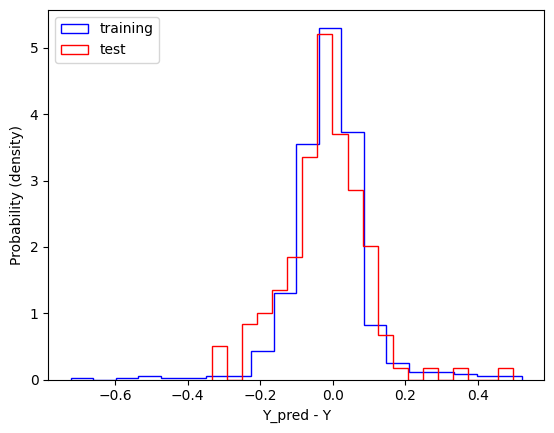

In [24]:
plt.hist(Y_train_pred-Y_train,20,color='b',histtype='step',density=True,label='training')
plt.hist(Y_test_pred-Y_test,20,color='r',histtype='step',density=True,label='test')
plt.xlabel('Y_pred - Y')
plt.ylabel('Probability (density)')
plt.legend()

In [25]:


print ('mean_train = ',np.mean(Y_train_pred-Y_train) )
print ('median_train = ',np.median(Y_train_pred-Y_train) )
print ('STD_train = ',np.std(Y_train_pred-Y_train) )

mean_train =  -0.009795241228070177
median_train =  -0.008656250000000032
STD_train =  0.10786444867741862


In [26]:


print ('mean_test = ',np.mean(Y_test_pred-Y_test) )
print ('median_test = ',np.median(Y_test_pred-Y_test) )
print ('STD_test = ',np.std(Y_test_pred-Y_test) )

mean_test =  -0.01957281468531468
median_test =  -0.01464999999999994
STD_test =  0.11456423200380324


# the Class Activity (1)

Use/repeat KNN for a regression problem using Boston data 

In [27]:
BH_data= pd.read_csv('Boston_Housing.csv')
BH_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        20640 non-null  int64  
 1   Unnamed: 0          20640 non-null  int64  
 2   longitude           20640 non-null  float64
 3   latitude            20640 non-null  float64
 4   housing_median_age  20640 non-null  float64
 5   total_rooms         20640 non-null  float64
 6   total_bedrooms      20640 non-null  float64
 7   population          20640 non-null  float64
 8   households          20640 non-null  float64
 9   median_income       20640 non-null  float64
 10  median_house_value  20640 non-null  float64
 11  ocean_proximity     20640 non-null  object 
dtypes: float64(9), int64(2), object(1)
memory usage: 1.9+ MB


In [28]:
BH_X= BH_data[['housing_median_age', 'total_rooms', 'total_bedrooms','population', 'households', 'median_income']].values
BH_Y= BH_data[['median_house_value']].values

print (np.shape(BH_X),np.shape(BH_Y))

(20640, 6) (20640, 1)


# 1- Normalize BH_X
# 2- Split data into 75% training and 25% test (see above)
# 3- Define the model (KNN) with n_neighbors=1 (see above)
# 4- Fit model to the training data (the 75%) 
# 5 - use the trained model to predict for both training and test sets
# 6 - obtain the performence metrics and plot relevant plots (see above example)
# Add  ocean_proximity    to BH_X and repeat 1-6  

In [29]:
BH_X= BH_data[['housing_median_age', 'total_rooms', 'total_bedrooms','population', 'households', 'median_income','ocean_proximity']].values
BH_Y= BH_data[['median_house_value']].values

print (np.shape(BH_X),np.shape(BH_Y))

(20640, 7) (20640, 1)


In [30]:
# we want to normalize the input using SKlearn


# choose one model with proper name
scaler_Norm=  StandardScaler()

# Find the trainable paramters of the model 

scaler_Norm.fit(BH_X) 


BH_X_norm= scaler_Norm.transform(BH_X)  # Line #4

print('Done!')

ValueError: could not convert string to float: 'NEAR BAY'

In [31]:
BH_data= pd.read_csv('Boston_Housing.csv')
BH_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        20640 non-null  int64  
 1   Unnamed: 0          20640 non-null  int64  
 2   longitude           20640 non-null  float64
 3   latitude            20640 non-null  float64
 4   housing_median_age  20640 non-null  float64
 5   total_rooms         20640 non-null  float64
 6   total_bedrooms      20640 non-null  float64
 7   population          20640 non-null  float64
 8   households          20640 non-null  float64
 9   median_income       20640 non-null  float64
 10  median_house_value  20640 non-null  float64
 11  ocean_proximity     20640 non-null  object 
dtypes: float64(9), int64(2), object(1)
memory usage: 1.9+ MB


In [32]:
BH_data

Unnamed: 0.1  Unnamed: 0  longitude  latitude  housing_median_age  \
0                 0           0    -122.23     37.88                41.0   
1                 1           1    -122.22     37.86                21.0   
2                 2           2    -122.24     37.85                52.0   
3                 3           3    -122.25     37.85                52.0   
4                 4           4    -122.25     37.85                52.0   
...             ...         ...        ...       ...                 ...   
20635         20635       20635    -121.09     39.48                25.0   
20636         20636       20636    -121.21     39.49                18.0   
20637         20637       20637    -121.22     39.43                17.0   
20638         20638       20638    -121.32     39.43                18.0   
20639         20639       20639    -121.24     39.37                16.0   

       total_rooms  total_bedrooms  population  households  median_income  \
0            880.0           129.0       322.0       126.0         8.3252   
1           7099.0          1106.0      2401.0      1138.0         8.3014   
2           1467.0           190.0       496.0       177.0         7.2574   
3           1274.0           235.0       558.0       219.0         5.6431   
4           1627.0           280.0       565.0       259.0         3.8462   
...            ...             ...         ...         ...            ...   
20635       1665.0           374.0       845.0       330.0         1.5603   
20636        697.0           150.0       356.0       114.0         2.5568   
20637       2254.0           485.0      1007.0       433.0         1.7000   
20638       1860.0           409.0       741.0       349.0         1.8672   
20639       2785.0           616.0      1387.0       530.0         2.3886   

       median_house_value ocean_proximity  
0                452600.0        NEAR BAY  
1                358500.0        NEAR BAY  
2                352100.0        NEAR BAY  
3                341300.0        NEAR BAY  
4                342200.0        NEAR BAY  
...                   ...             ...  
20635             78100.0          INLAND  
20636             77100.0          INLAND  
20637             92300.0          INLAND  
20638             84700.0          INLAND  
20639             89400.0          INLAND  

[20640 rows x 12 columns]

In [33]:
one_hot = pd.get_dummies(BH_data['ocean_proximity'])
BH_data = BH_data.drop('ocean_proximity',axis = 1)
BH_data = BH_data.join(one_hot)

In [34]:
BH_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        20640 non-null  int64  
 1   Unnamed: 0          20640 non-null  int64  
 2   longitude           20640 non-null  float64
 3   latitude            20640 non-null  float64
 4   housing_median_age  20640 non-null  float64
 5   total_rooms         20640 non-null  float64
 6   total_bedrooms      20640 non-null  float64
 7   population          20640 non-null  float64
 8   households          20640 non-null  float64
 9   median_income       20640 non-null  float64
 10  median_house_value  20640 non-null  float64
 11  <1H OCEAN           20640 non-null  uint8  
 12  INLAND              20640 non-null  uint8  
 13  ISLAND              20640 non-null  uint8  
 14  NEAR BAY            20640 non-null  uint8  
 15  NEAR OCEAN          20640 non-null  uint8  
dtypes: f

In [35]:
BH_X= BH_data[['housing_median_age', 'total_rooms', 'total_bedrooms','population', 'households', 'median_income','<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN']].values
BH_Y= BH_data[['median_house_value']].values

print (np.shape(BH_X),np.shape(BH_Y))

(20640, 11) (20640, 1)


In [36]:
# we want to normalize the input using SKlearn


# choose one model with proper name
scaler_Norm =  StandardScaler()

# Find the trainable paramters of the model 

scaler_Norm.fit(BH_X) 


BH_X_norm= scaler_Norm.transform(BH_X)  # Line #4

print('Done!')

Done!


# Now repear 1-6 for the regression problem

# what about classification problems 
# choose a model and get the results

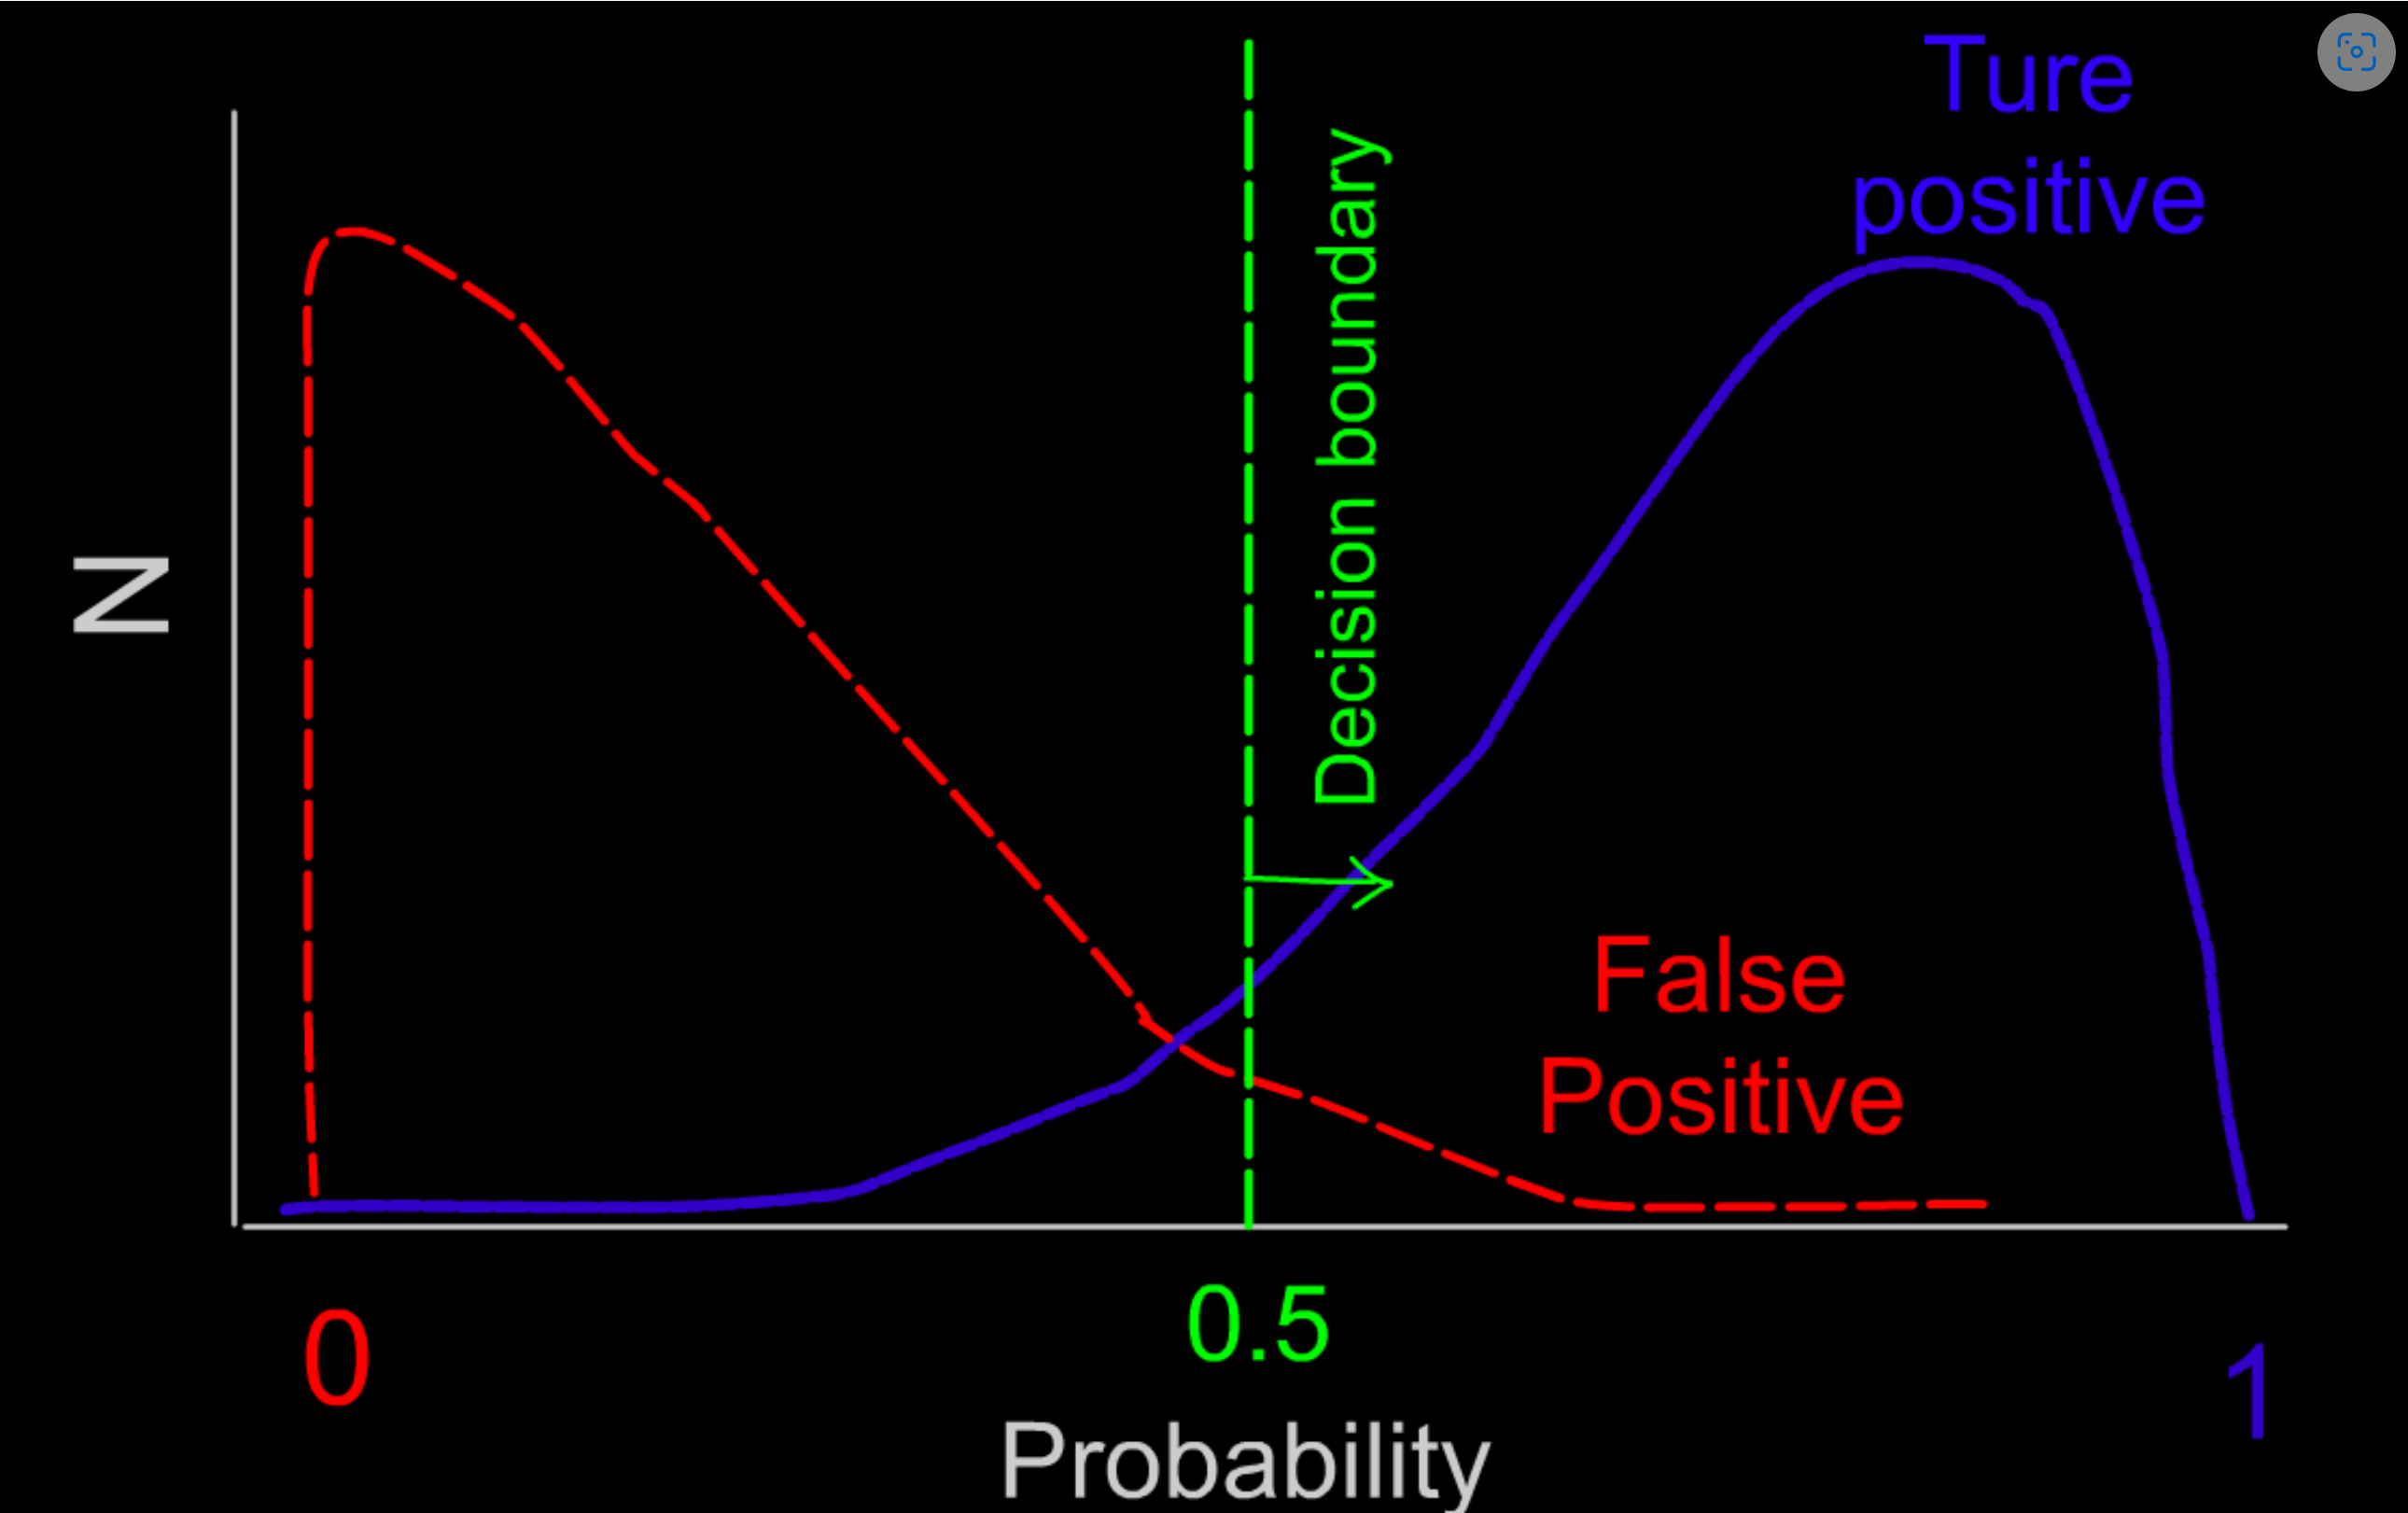
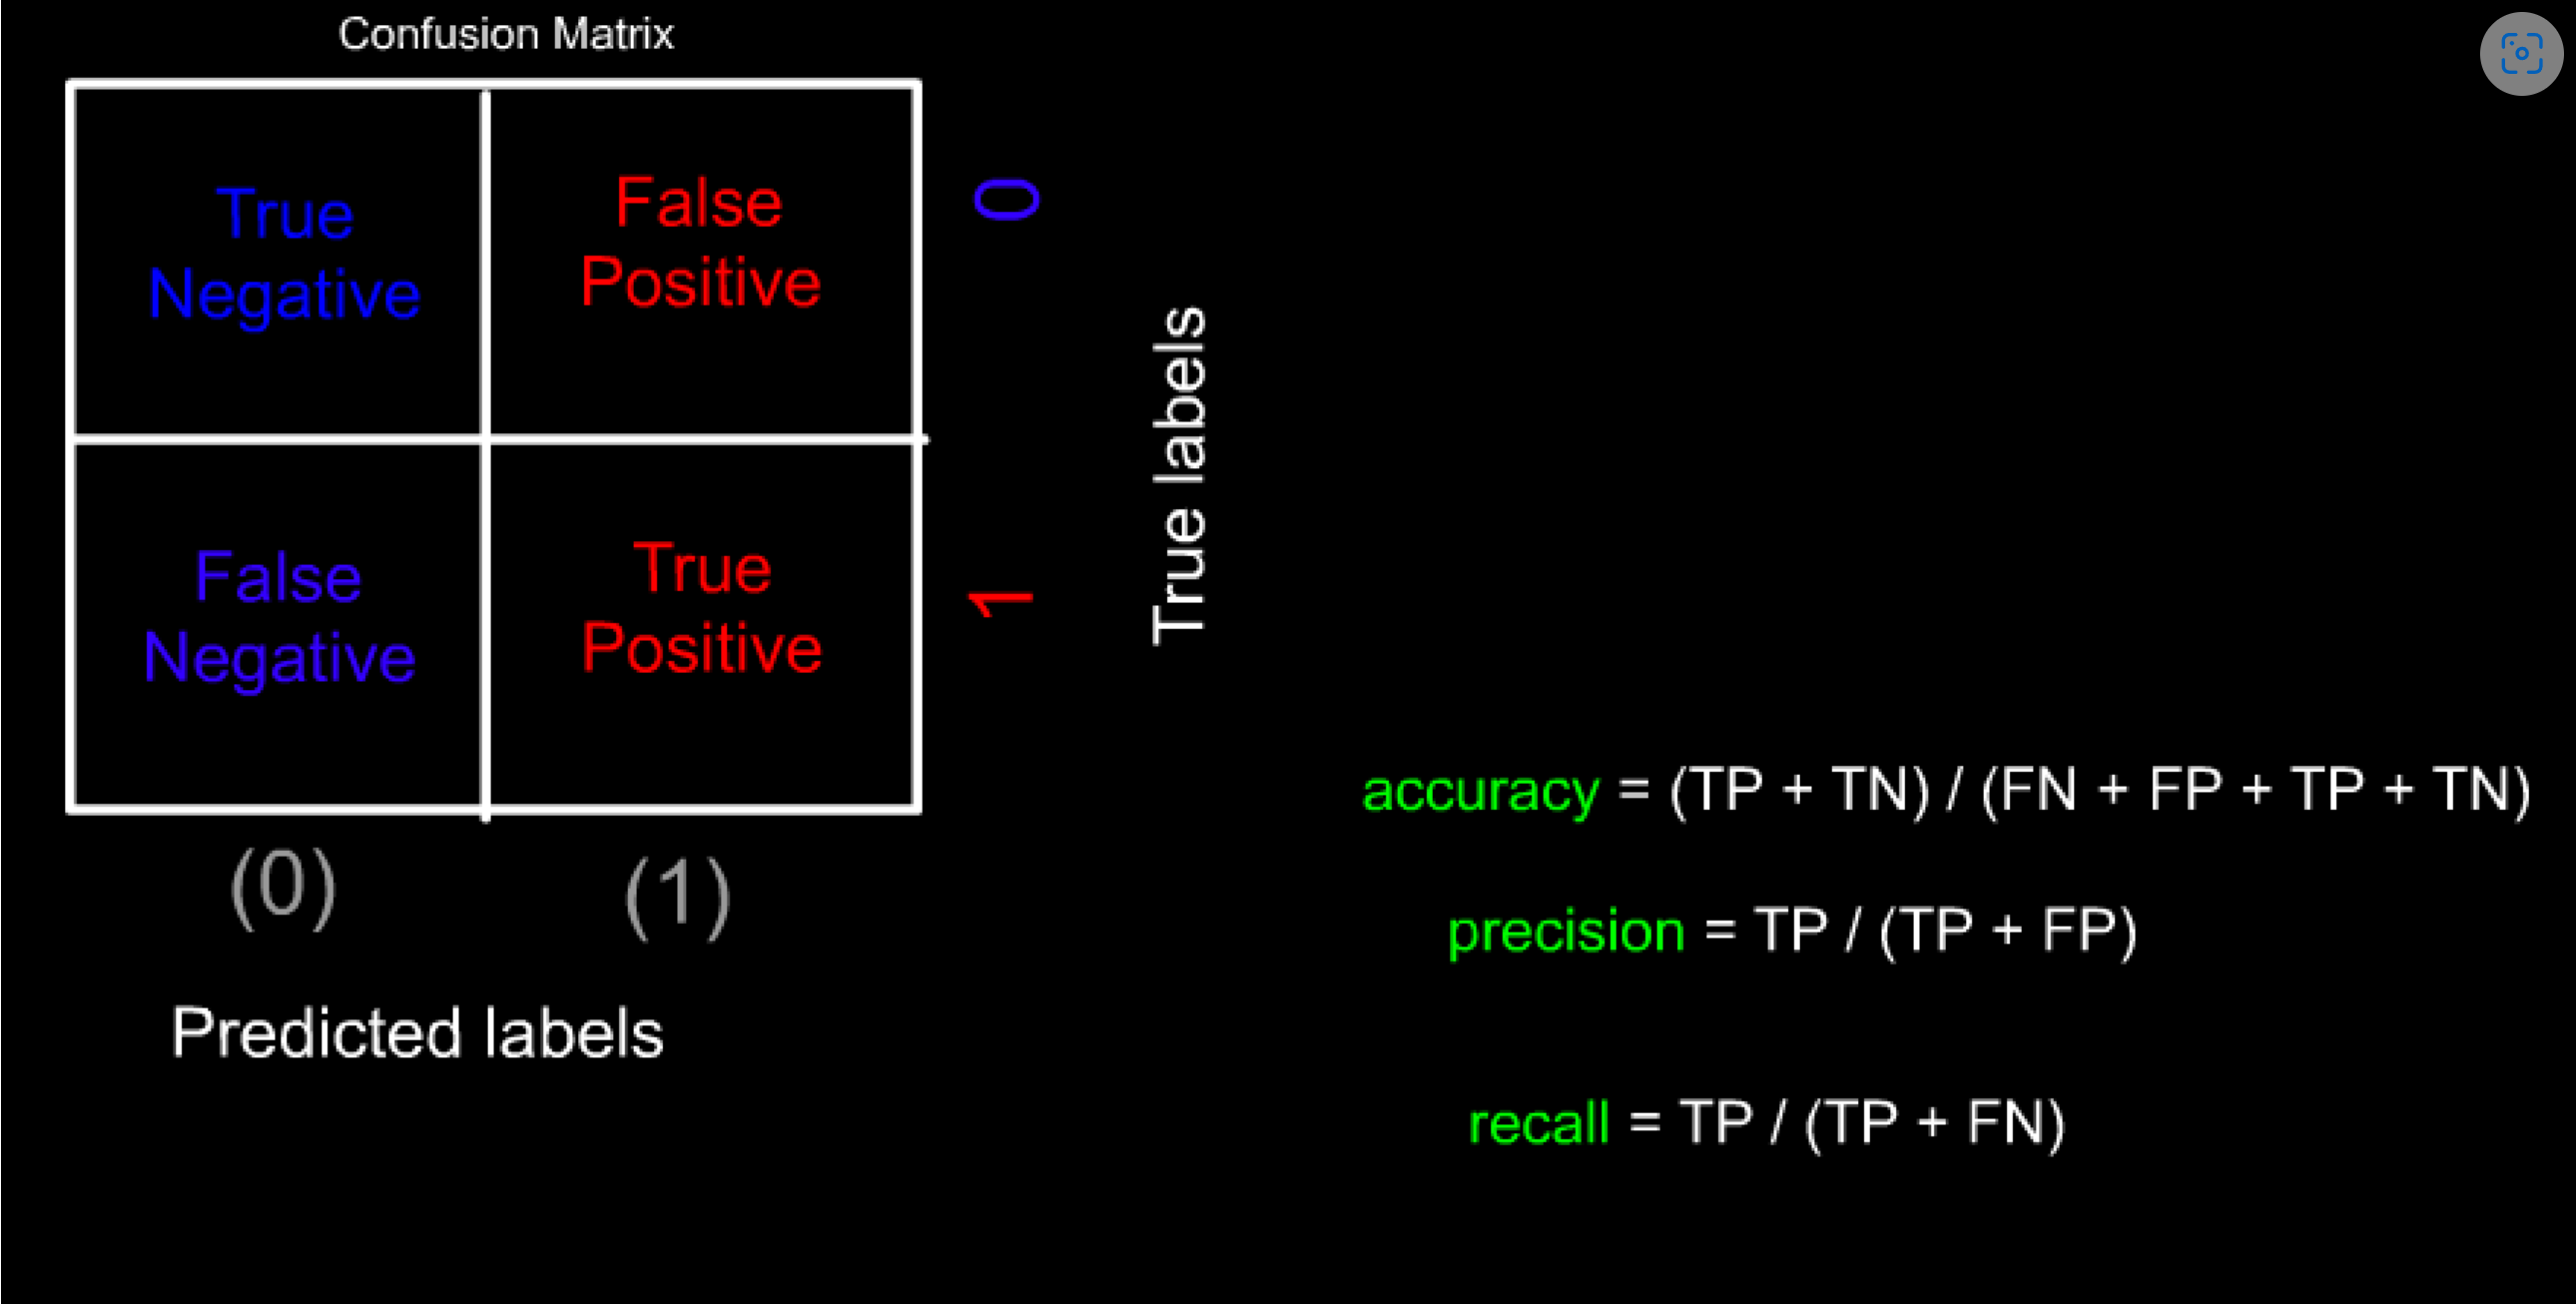

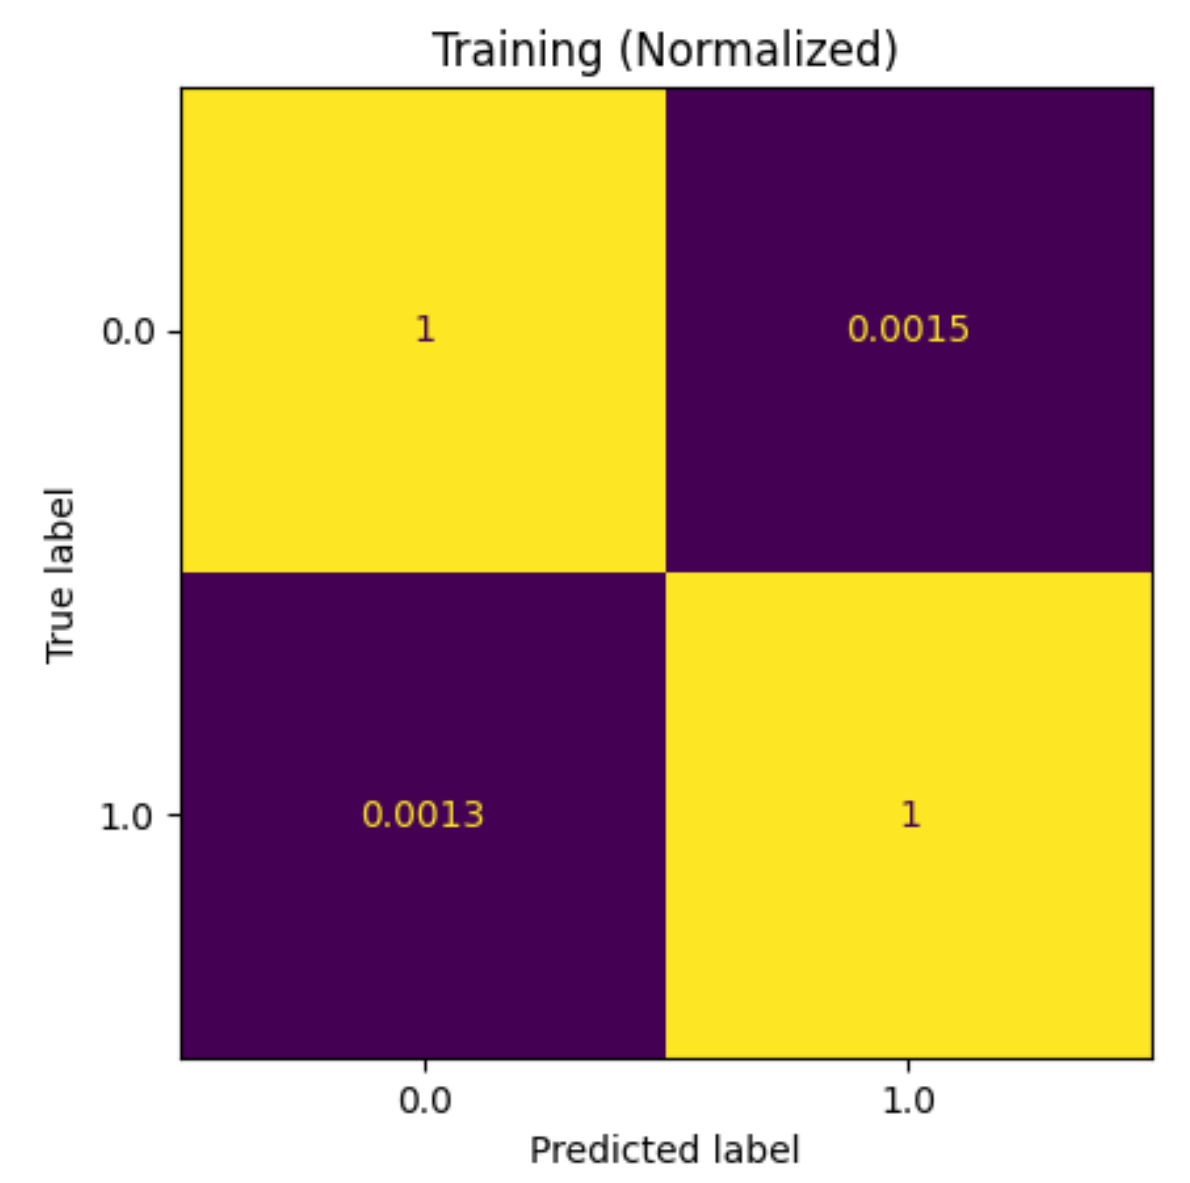
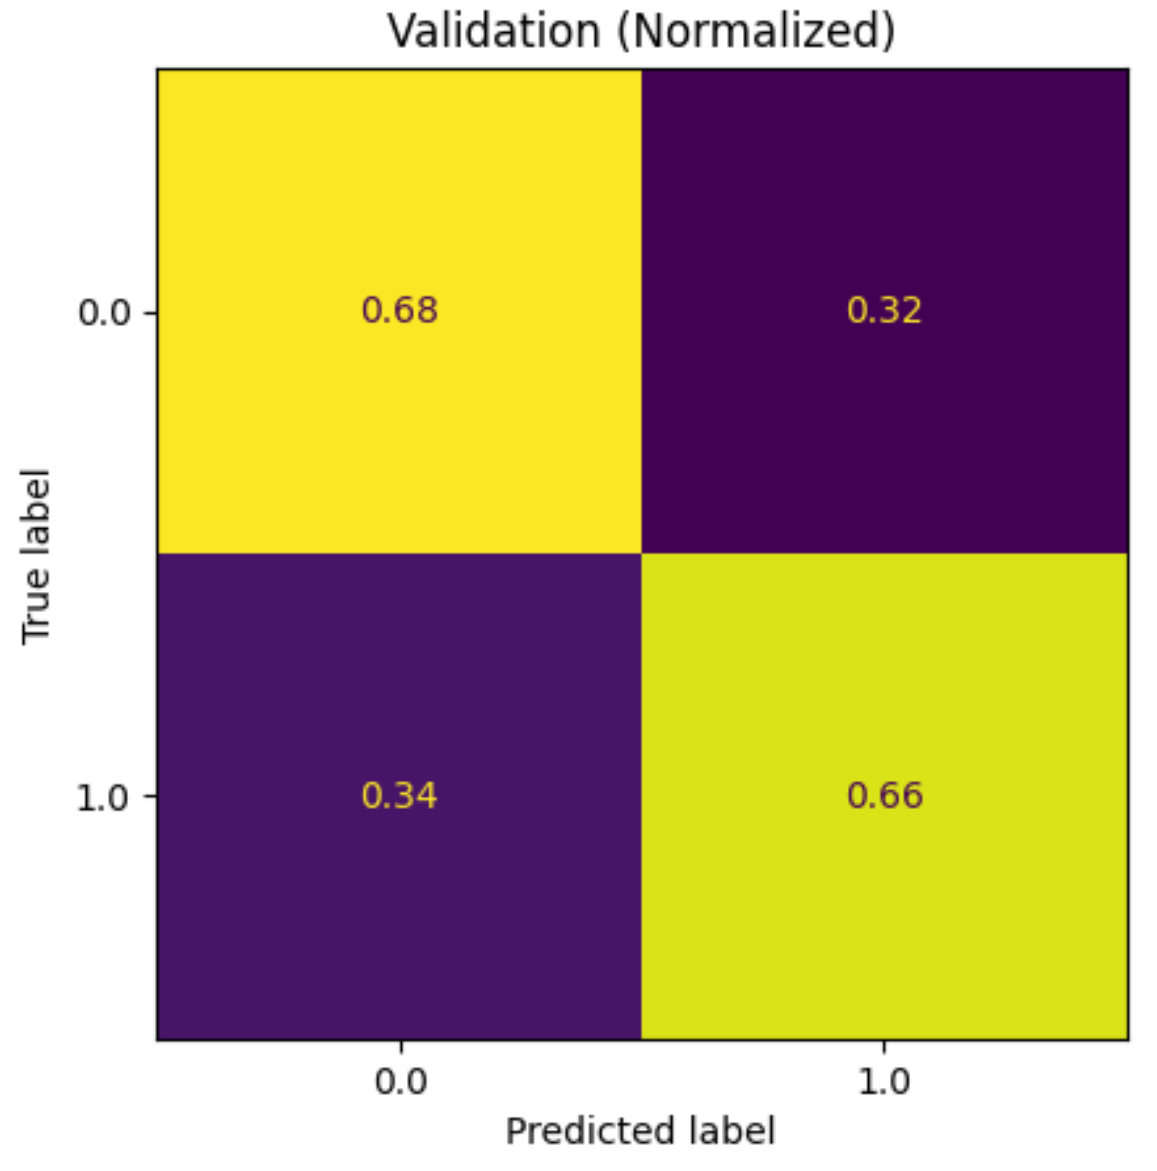

In [37]:
X=np.loadtxt('inp_Cancer.txt')
Y=np.loadtxt('tar_Cancer.txt')

#Y= np.reshape(Y,(-1, 1))
print(np.shape(X),np.shape(Y))

(13674, 15) (13674,)


In [38]:
# we want to normalize the input using SKlearn


# choose one model with proper name
scaler_Norm=  StandardScaler()

# Find the trainable paramters of the model 

scaler_Norm.fit(X) 


X_norm= scaler_Norm.transform(X)  # Line #4

print('Done!')

Done!


In [39]:
X_tr, X_va, Y_tr, Y_va = train_test_split(X_norm, Y, test_size=0.2)
print ('shape inp  == ', np.shape(X))
print ('shape tar  == ', np.shape(Y))

print ('shape X_tr , Y_tr (trining set (input and target, respectively) == ', np.shape(X_tr),np.shape(Y_tr))
print ('shape X_va , Y_va (Validation set (input and target, respectively) == ', np.shape(X_va),np.shape(Y_va))

shape inp  ==  (13674, 15)
shape tar  ==  (13674,)
shape X_tr , Y_tr (trining set (input and target, respectively) ==  (10939, 15) (10939,)
shape X_va , Y_va (Validation set (input and target, respectively) ==  (2735, 15) (2735,)


In [40]:
# import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
# import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [41]:
# define the model
KNN_classifier = KNeighborsClassifier(n_neighbors=1)

In [42]:
# fit the model (train)
KNN_classifier.fit(X_tr, Y_tr)

KNeighborsClassifier(n_neighbors=1)

In [43]:
# predict for both traininf and test sets 
Y_tr_pred= KNN_classifier.predict(X_tr)
Y_va_pred= KNN_classifier.predict(X_va)

C:\Users\hteim\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 640x480 with 0 Axes>

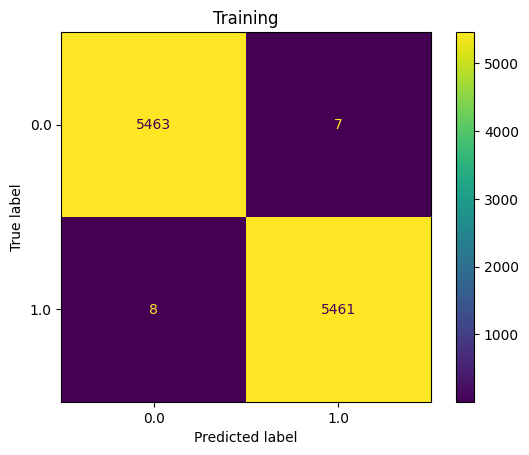

C:\Users\hteim\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 640x480 with 0 Axes>

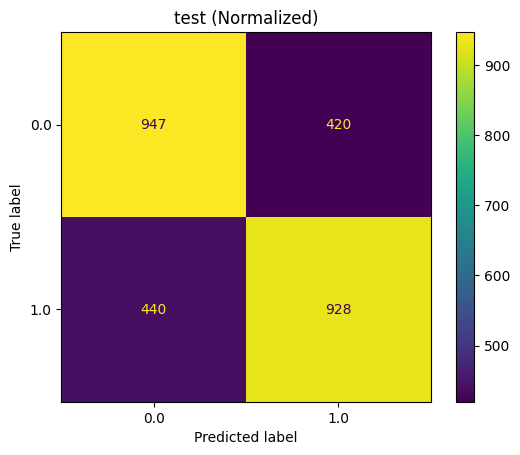

In [44]:
# plot the confusion matrix 

plt.figure(0)
plot_confusion_matrix(KNN_classifier, X_tr, Y_tr)  
plt.title('Training')
plt.show()  


plt.figure(1)
plot_confusion_matrix(KNN_classifier, X_va, Y_va)  
plt.title('test (Normalized)')
plt.show()  


C:\Users\hteim\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 640x480 with 0 Axes>

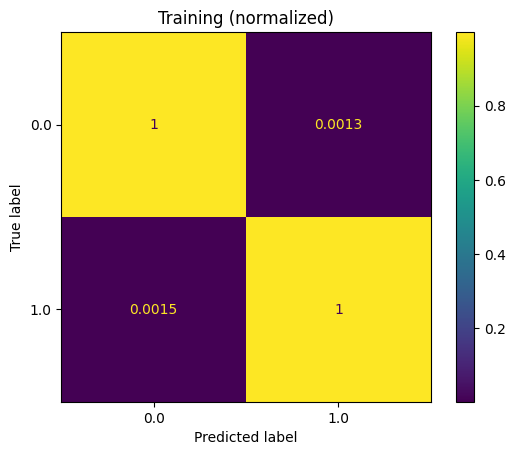

C:\Users\hteim\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 640x480 with 0 Axes>

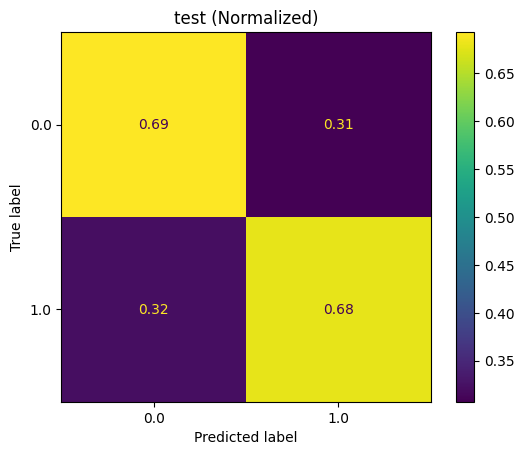

In [45]:
# plot the confusion matrix (normalized)

plt.figure(0)
plot_confusion_matrix(KNN_classifier, X_tr, Y_tr,normalize='true')  
plt.title('Training (normalized)')
plt.show()  


plt.figure(1)
plot_confusion_matrix(KNN_classifier, X_va, Y_va,normalize='true')  
plt.title('test (Normalized)')
plt.show()  


### Acticity 2:
1. Find metrics Precision, recall and accuracy for the two confusion matrices above 
2. Find the best n_neighbors in the model

In [ ]:
# Precision
Precision = (1+1)/(0.0015+0.0013)

# Recall

# Accuracy

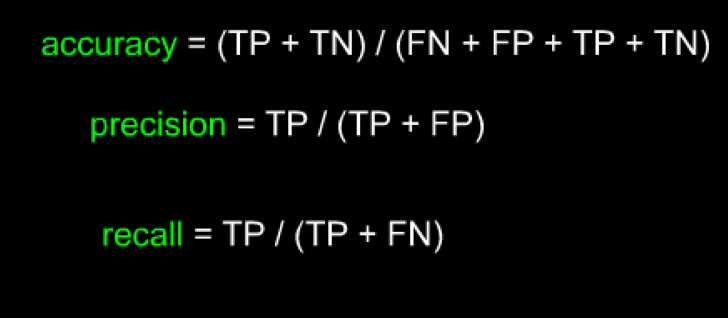

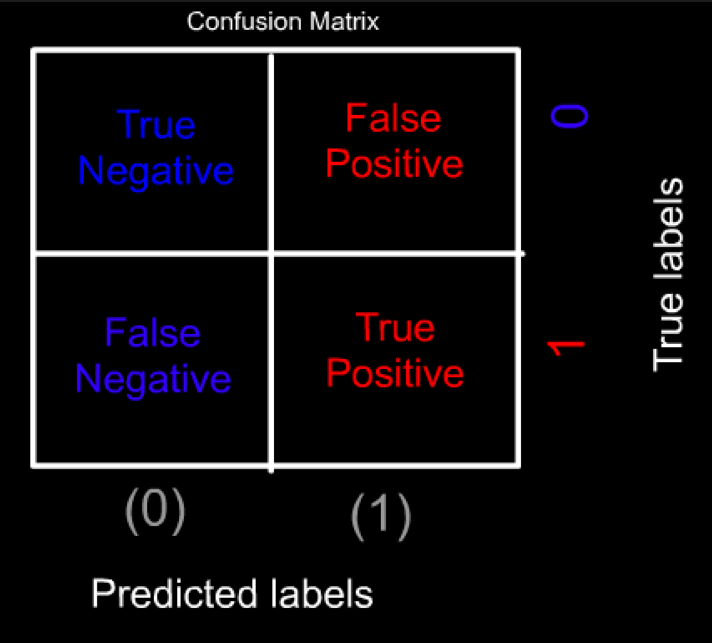